In [62]:
import os
import glob
import matplotlib.pyplot as plt
import re
import json 
import pandas as pd
import time 
#pytorch
import torch
from torch.utils.data import Dataset, DataLoader
import cv2

## Details of data
* patch label of an MSI type is 1.
* patch label of an MSS type is 0.


# Make a data.json file 
- expect MSS directory with MSS patches images 
- expect MSIMUT directory with MSI patches images

- change manually the path

In [335]:
# set patches directory
# path = os.path.abspath('./MSIMUT/')
path = os.path.abspath('./MSS/')
data_path = os.path.join(path,'*g')
files = glob.glob(data_path)

In [336]:
def build_patch_dict(file_name, is_MSS):
    patch_dict = {}
    file_name_list = file_name.split('-')
    patch_id, patient_id = file_name_list[1], file_name_list[2:5]
    patient_id = '-'.join(patient_id)
    patch_dict['img_name'] = file_name  
    patch_dict['patient_id'] = patient_id
    patch_dict['patch_id'] = patch_id
    patch_dict['label'] = is_MSS  
    return patch_dict

def get_file_name(file):
    delimiters = "\\", "."
    regexPattern = '|'.join(map(re.escape, delimiters))
    return re.split(regexPattern, file)[-2]
    

In [337]:
patches_list = []
for file in files:
    file_name = get_file_name(file)
    patch_dict = build_patch_dict(file_name, is_MSS=1)
    print(patch_dict)
    patches_list.append(patch_dict)
    
    

{'img_name': 'blk-AAADNFVSTKEF-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'AAADNFVSTKEF', 'label': 1}
{'img_name': 'blk-AAADPEIDNRVQ-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'AAADPEIDNRVQ', 'label': 1}
{'img_name': 'blk-AAAFDSIYEAPC-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'AAAFDSIYEAPC', 'label': 1}
{'img_name': 'blk-AAAHVLHKARAN-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'AAAHVLHKARAN', 'label': 1}
{'img_name': 'blk-AAAIANVEVMQV-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'AAAIANVEVMQV', 'label': 1}
{'img_name': 'blk-AAAMGKITFHHE-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'AAAMGKITFHHE', 'label': 1}
{'img_name': 'blk-AAANDKEVVQWA-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'AAANDKEVVQWA', 'label': 1}
{'img_name': 'blk-AAANDYDPQCED-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'AAANDYDPQCE

{'img_name': 'blk-AGQGYSMPFINS-TCGA-AG-3887-01Z-00-DX1', 'patient_id': 'TCGA-AG-3887', 'patch_id': 'AGQGYSMPFINS', 'label': 1}
{'img_name': 'blk-AGQNAPCYKVGE-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'AGQNAPCYKVGE', 'label': 1}
{'img_name': 'blk-AGQNEQIWRKTG-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'AGQNEQIWRKTG', 'label': 1}
{'img_name': 'blk-AGQWHANDSSMY-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'AGQWHANDSSMY', 'label': 1}
{'img_name': 'blk-AGRCLGSACNPG-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'AGRCLGSACNPG', 'label': 1}
{'img_name': 'blk-AGRCTCWPVEFY-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'AGRCTCWPVEFY', 'label': 1}
{'img_name': 'blk-AGRKKQKFHAIM-TCGA-AA-3875-01Z-00-DX1', 'patient_id': 'TCGA-AA-3875', 'patch_id': 'AGRKKQKFHAIM', 'label': 1}
{'img_name': 'blk-AGRKTKHIKSKL-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'AGRKTKHIKSK

{'img_name': 'blk-AKKFDPDDTQDE-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'AKKFDPDDTQDE', 'label': 1}
{'img_name': 'blk-AKKIPTVQHVHC-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'AKKIPTVQHVHC', 'label': 1}
{'img_name': 'blk-AKKNGCESHWAD-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'AKKNGCESHWAD', 'label': 1}
{'img_name': 'blk-AKKQGHPAYITT-TCGA-AF-A56N-01Z-00-DX1', 'patient_id': 'TCGA-AF-A56N', 'patch_id': 'AKKQGHPAYITT', 'label': 1}
{'img_name': 'blk-AKKQHIVSIVPY-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'AKKQHIVSIVPY', 'label': 1}
{'img_name': 'blk-AKKRYEYKQQMI-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'AKKRYEYKQQMI', 'label': 1}
{'img_name': 'blk-AKKSYSFTTWVD-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'AKKSYSFTTWVD', 'label': 1}
{'img_name': 'blk-AKLCWPQRDMGV-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'AKLCWPQRDMG

{'img_name': 'blk-ANERFFYVANHE-TCGA-G4-6311-01Z-00-DX1', 'patient_id': 'TCGA-G4-6311', 'patch_id': 'ANERFFYVANHE', 'label': 1}
{'img_name': 'blk-ANERTPGHAEIC-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'ANERTPGHAEIC', 'label': 1}
{'img_name': 'blk-ANESGTHNNPYV-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'ANESGTHNNPYV', 'label': 1}
{'img_name': 'blk-ANFAQCIARGNP-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'ANFAQCIARGNP', 'label': 1}
{'img_name': 'blk-ANFCNDIYIMPE-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'ANFCNDIYIMPE', 'label': 1}
{'img_name': 'blk-ANFGVDLELHFC-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'ANFGVDLELHFC', 'label': 1}
{'img_name': 'blk-ANFHCFAQSMQS-TCGA-AH-6544-01Z-00-DX1', 'patient_id': 'TCGA-AH-6544', 'patch_id': 'ANFHCFAQSMQS', 'label': 1}
{'img_name': 'blk-ANFNICFCCWPR-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'ANFNICFCCWP

{'img_name': 'blk-ATCHHFISEYCP-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'ATCHHFISEYCP', 'label': 1}
{'img_name': 'blk-ATCIGNIMQIYC-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'ATCIGNIMQIYC', 'label': 1}
{'img_name': 'blk-ATCLSNCGDWWS-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'ATCLSNCGDWWS', 'label': 1}
{'img_name': 'blk-ATCNQTCPTPEC-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'ATCNQTCPTPEC', 'label': 1}
{'img_name': 'blk-ATCNVFIWMKCD-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'ATCNVFIWMKCD', 'label': 1}
{'img_name': 'blk-ATCSPENCICLQ-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'ATCSPENCICLQ', 'label': 1}
{'img_name': 'blk-ATCTECKPMTAN-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'ATCTECKPMTAN', 'label': 1}
{'img_name': 'blk-ATDATMSCPVSD-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'ATDATMSCPVS

{'img_name': 'blk-AYQVHPMEFKDA-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'AYQVHPMEFKDA', 'label': 1}
{'img_name': 'blk-AYRAMIQMYLCF-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'AYRAMIQMYLCF', 'label': 1}
{'img_name': 'blk-AYREKEDVEPKR-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'AYREKEDVEPKR', 'label': 1}
{'img_name': 'blk-AYRHHNGNLSSI-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'AYRHHNGNLSSI', 'label': 1}
{'img_name': 'blk-AYRICYGTLFSA-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'AYRICYGTLFSA', 'label': 1}
{'img_name': 'blk-AYRMWRSVCACT-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'AYRMWRSVCACT', 'label': 1}
{'img_name': 'blk-AYRTLQIQIPVW-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'AYRTLQIQIPVW', 'label': 1}
{'img_name': 'blk-AYRYLGIWVATK-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'AYRYLGIWVAT

{'img_name': 'blk-CGKVTQHPVKRW-TCGA-AA-A02O-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02O', 'patch_id': 'CGKVTQHPVKRW', 'label': 1}
{'img_name': 'blk-CGLCVSNIAGGM-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'CGLCVSNIAGGM', 'label': 1}
{'img_name': 'blk-CGLRWTWGEDMR-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'CGLRWTWGEDMR', 'label': 1}
{'img_name': 'blk-CGLRYPFWYGWI-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'CGLRYPFWYGWI', 'label': 1}
{'img_name': 'blk-CGLSRAWFVDSV-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'CGLSRAWFVDSV', 'label': 1}
{'img_name': 'blk-CGLWEEDAYIFI-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'CGLWEEDAYIFI', 'label': 1}
{'img_name': 'blk-CGLYTTYRSMMS-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'CGLYTTYRSMMS', 'label': 1}
{'img_name': 'blk-CGMAPYTHYPQK-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'CGMAPYTHYPQ

{'img_name': 'blk-CMAWMQNGYWKL-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'CMAWMQNGYWKL', 'label': 1}
{'img_name': 'blk-CMCCPSYYLGMV-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'CMCCPSYYLGMV', 'label': 1}
{'img_name': 'blk-CMCEIKINFREE-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'CMCEIKINFREE', 'label': 1}
{'img_name': 'blk-CMCEMLEMHTYR-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'CMCEMLEMHTYR', 'label': 1}
{'img_name': 'blk-CMCHFRLMCKEL-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'CMCHFRLMCKEL', 'label': 1}
{'img_name': 'blk-CMCKWSQMWTPE-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'CMCKWSQMWTPE', 'label': 1}
{'img_name': 'blk-CMCQFCQNIWMW-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'CMCQFCQNIWMW', 'label': 1}
{'img_name': 'blk-CMCQGRDETTVI-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'CMCQGRDETTV

{'img_name': 'blk-CQEGWNILFGEC-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'CQEGWNILFGEC', 'label': 1}
{'img_name': 'blk-CQEKICPFMVVY-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'CQEKICPFMVVY', 'label': 1}
{'img_name': 'blk-CQEMTYEEHCVT-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'CQEMTYEEHCVT', 'label': 1}
{'img_name': 'blk-CQEPELHCHWVI-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'CQEPELHCHWVI', 'label': 1}
{'img_name': 'blk-CQEQPMWRGHMH-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'CQEQPMWRGHMH', 'label': 1}
{'img_name': 'blk-CQETCWIWDDYT-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'CQETCWIWDDYT', 'label': 1}
{'img_name': 'blk-CQEVLCAGPEWP-TCGA-AA-3818-01Z-00-DX1', 'patient_id': 'TCGA-AA-3818', 'patch_id': 'CQEVLCAGPEWP', 'label': 1}
{'img_name': 'blk-CQEYDVWIFTPD-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'CQEYDVWIFTP

{'img_name': 'blk-CWSAGFAWGYTI-TCGA-AH-6544-01Z-00-DX1', 'patient_id': 'TCGA-AH-6544', 'patch_id': 'CWSAGFAWGYTI', 'label': 1}
{'img_name': 'blk-CWSEDIFQTVMS-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'CWSEDIFQTVMS', 'label': 1}
{'img_name': 'blk-CWSERVTRFQIG-TCGA-D5-6536-01Z-00-DX1', 'patient_id': 'TCGA-D5-6536', 'patch_id': 'CWSERVTRFQIG', 'label': 1}
{'img_name': 'blk-CWSIRYQNMQQH-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'CWSIRYQNMQQH', 'label': 1}
{'img_name': 'blk-CWSISGLNDMQS-TCGA-AA-3818-01Z-00-DX1', 'patient_id': 'TCGA-AA-3818', 'patch_id': 'CWSISGLNDMQS', 'label': 1}
{'img_name': 'blk-CWSLKDGEPAAV-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'CWSLKDGEPAAV', 'label': 1}
{'img_name': 'blk-CWSLQNFVTQSL-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'CWSLQNFVTQSL', 'label': 1}
{'img_name': 'blk-CWSQDIEDGEWE-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'CWSQDIEDGEW

{'img_name': 'blk-DDKYEHEFAWIM-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'DDKYEHEFAWIM', 'label': 1}
{'img_name': 'blk-DDKYVSNADNRN-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'DDKYVSNADNRN', 'label': 1}
{'img_name': 'blk-DDLDGGYHGFCE-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'DDLDGGYHGFCE', 'label': 1}
{'img_name': 'blk-DDLHMQTYQHTA-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'DDLHMQTYQHTA', 'label': 1}
{'img_name': 'blk-DDLHTPWKFSNY-TCGA-AF-2687-01Z-00-DX1', 'patient_id': 'TCGA-AF-2687', 'patch_id': 'DDLHTPWKFSNY', 'label': 1}
{'img_name': 'blk-DDLKGVMMFPTC-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'DDLKGVMMFPTC', 'label': 1}
{'img_name': 'blk-DDLKHMTYGMEE-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'DDLKHMTYGMEE', 'label': 1}
{'img_name': 'blk-DDLLEPLAQIAF-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'DDLLEPLAQIA

{'img_name': 'blk-DGPIHQRAYEPE-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'DGPIHQRAYEPE', 'label': 1}
{'img_name': 'blk-DGPKCGDQKDNK-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'DGPKCGDQKDNK', 'label': 1}
{'img_name': 'blk-DGPLAPAMVTWF-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'DGPLAPAMVTWF', 'label': 1}
{'img_name': 'blk-DGPSEPPKYYPL-TCGA-AG-3898-01Z-00-DX1', 'patient_id': 'TCGA-AG-3898', 'patch_id': 'DGPSEPPKYYPL', 'label': 1}
{'img_name': 'blk-DGPSMWPELPCH-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'DGPSMWPELPCH', 'label': 1}
{'img_name': 'blk-DGQACEIICSQI-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'DGQACEIICSQI', 'label': 1}
{'img_name': 'blk-DGQASKYDSRNH-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'DGQASKYDSRNH', 'label': 1}
{'img_name': 'blk-DGQDCKYSHNTL-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'DGQDCKYSHNT

{'img_name': 'blk-DKVTVWFFESES-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'DKVTVWFFESES', 'label': 1}
{'img_name': 'blk-DKVYCRDILHLE-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'DKVYCRDILHLE', 'label': 1}
{'img_name': 'blk-DKWDCALITVAE-TCGA-F5-6702-01Z-00-DX1', 'patient_id': 'TCGA-F5-6702', 'patch_id': 'DKWDCALITVAE', 'label': 1}
{'img_name': 'blk-DKWDECGAVKLL-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'DKWDECGAVKLL', 'label': 1}
{'img_name': 'blk-DKWIAQEPYQPS-TCGA-CK-4950-01Z-00-DX1', 'patient_id': 'TCGA-CK-4950', 'patch_id': 'DKWIAQEPYQPS', 'label': 1}
{'img_name': 'blk-DKWIHRHTEQEH-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'DKWIHRHTEQEH', 'label': 1}
{'img_name': 'blk-DKWTSGKSWNYV-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'DKWTSGKSWNYV', 'label': 1}
{'img_name': 'blk-DKWWDGLNGHYS-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'DKWWDGLNGHY

{'img_name': 'blk-DQNACIQYSTWT-TCGA-AF-6136-01Z-00-DX1', 'patient_id': 'TCGA-AF-6136', 'patch_id': 'DQNACIQYSTWT', 'label': 1}
{'img_name': 'blk-DQNCYTHVSCRS-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'DQNCYTHVSCRS', 'label': 1}
{'img_name': 'blk-DQNIMVKMCVLV-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'DQNIMVKMCVLV', 'label': 1}
{'img_name': 'blk-DQNKPRAMWNLR-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'DQNKPRAMWNLR', 'label': 1}
{'img_name': 'blk-DQNLNEIRDTRM-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'DQNLNEIRDTRM', 'label': 1}
{'img_name': 'blk-DQNMMGAEGSSD-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'DQNMMGAEGSSD', 'label': 1}
{'img_name': 'blk-DQNQEHSNPMTT-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'DQNQEHSNPMTT', 'label': 1}
{'img_name': 'blk-DQNWSPTKQNIR-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'DQNWSPTKQNI

{'img_name': 'blk-DYRDYHKNFVIT-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'DYRDYHKNFVIT', 'label': 1}
{'img_name': 'blk-DYRHCTGHWYIK-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'DYRHCTGHWYIK', 'label': 1}
{'img_name': 'blk-DYRHKMVWLTDN-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'DYRHKMVWLTDN', 'label': 1}
{'img_name': 'blk-DYRITPARCMSE-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'DYRITPARCMSE', 'label': 1}
{'img_name': 'blk-DYRIWYGGQGYC-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'DYRIWYGGQGYC', 'label': 1}
{'img_name': 'blk-DYRLQIMWHDLV-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'DYRLQIMWHDLV', 'label': 1}
{'img_name': 'blk-DYRRCRWRWNKG-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'DYRRCRWRWNKG', 'label': 1}
{'img_name': 'blk-DYRRHCCIYQHF-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'DYRRHCCIYQH

{'img_name': 'blk-EDPYRSGRWMGH-TCGA-AA-3837-01Z-00-DX1', 'patient_id': 'TCGA-AA-3837', 'patch_id': 'EDPYRSGRWMGH', 'label': 1}
{'img_name': 'blk-EDQFANQLTAPM-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'EDQFANQLTAPM', 'label': 1}
{'img_name': 'blk-EDQFIVIQYMAE-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'EDQFIVIQYMAE', 'label': 1}
{'img_name': 'blk-EDQFMQWQHKVP-TCGA-DM-A1D7-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D7', 'patch_id': 'EDQFMQWQHKVP', 'label': 1}
{'img_name': 'blk-EDQGDMCYWRQR-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'EDQGDMCYWRQR', 'label': 1}
{'img_name': 'blk-EDQKADVSYPQT-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'EDQKADVSYPQT', 'label': 1}
{'img_name': 'blk-EDQKPLPIYMCF-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'EDQKPLPIYMCF', 'label': 1}
{'img_name': 'blk-EDQLKSHQELWN-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'EDQLKSHQELW

{'img_name': 'blk-EIYQYSIMIMWH-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'EIYQYSIMIMWH', 'label': 1}
{'img_name': 'blk-EIYRACNHLMWS-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'EIYRACNHLMWS', 'label': 1}
{'img_name': 'blk-EIYWGMNHGRMQ-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'EIYWGMNHGRMQ', 'label': 1}
{'img_name': 'blk-EKAEKGLQHVWQ-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'EKAEKGLQHVWQ', 'label': 1}
{'img_name': 'blk-EKAELNMIFIDS-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'EKAELNMIFIDS', 'label': 1}
{'img_name': 'blk-EKAERCRALRGH-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'EKAERCRALRGH', 'label': 1}
{'img_name': 'blk-EKAFWYCMDYTS-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'EKAFWYCMDYTS', 'label': 1}
{'img_name': 'blk-EKALNCRNRHLC-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'EKALNCRNRHL

{'img_name': 'blk-EMYEHNGWMMYH-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'EMYEHNGWMMYH', 'label': 1}
{'img_name': 'blk-EMYEQNYDVTIW-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'EMYEQNYDVTIW', 'label': 1}
{'img_name': 'blk-EMYEQTDILWPN-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'EMYEQTDILWPN', 'label': 1}
{'img_name': 'blk-EMYHKCTVNQAN-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'EMYHKCTVNQAN', 'label': 1}
{'img_name': 'blk-EMYKCVMEWNVH-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'EMYKCVMEWNVH', 'label': 1}
{'img_name': 'blk-EMYMCPVEQAFA-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'EMYMCPVEQAFA', 'label': 1}
{'img_name': 'blk-EMYNQKWYMKMR-TCGA-AA-3875-01Z-00-DX1', 'patient_id': 'TCGA-AA-3875', 'patch_id': 'EMYNQKWYMKMR', 'label': 1}
{'img_name': 'blk-EMYPTRQCMVIL-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'EMYPTRQCMVI

{'img_name': 'blk-ESGKWHIIYHET-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'ESGKWHIIYHET', 'label': 1}
{'img_name': 'blk-ESGSMTTMCPYH-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'ESGSMTTMCPYH', 'label': 1}
{'img_name': 'blk-ESGWASNPKLDD-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'ESGWASNPKLDD', 'label': 1}
{'img_name': 'blk-ESHAFTNPKEVQ-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'ESHAFTNPKEVQ', 'label': 1}
{'img_name': 'blk-ESHDKLRDWIWI-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'ESHDKLRDWIWI', 'label': 1}
{'img_name': 'blk-ESHEAVYLNTWY-TCGA-AF-A56N-01Z-00-DX1', 'patient_id': 'TCGA-AF-A56N', 'patch_id': 'ESHEAVYLNTWY', 'label': 1}
{'img_name': 'blk-ESHFHLSVHQVC-TCGA-AA-3968-01Z-00-DX1', 'patient_id': 'TCGA-AA-3968', 'patch_id': 'ESHFHLSVHQVC', 'label': 1}
{'img_name': 'blk-ESHFMDMYAMCN-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'ESHFMDMYAMC

{'img_name': 'blk-EWGTTLQNPMDS-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'EWGTTLQNPMDS', 'label': 1}
{'img_name': 'blk-EWGWAAAKKQES-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'EWGWAAAKKQES', 'label': 1}
{'img_name': 'blk-EWHDIWESTLPV-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'EWHDIWESTLPV', 'label': 1}
{'img_name': 'blk-EWHKDKHDMYIV-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'EWHKDKHDMYIV', 'label': 1}
{'img_name': 'blk-EWHRIPEIYLAE-TCGA-AF-4110-01Z-00-DX1', 'patient_id': 'TCGA-AF-4110', 'patch_id': 'EWHRIPEIYLAE', 'label': 1}
{'img_name': 'blk-EWHYEIVFRKMI-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'EWHYEIVFRKMI', 'label': 1}
{'img_name': 'blk-EWICTVDHYVNP-TCGA-AG-3887-01Z-00-DX1', 'patient_id': 'TCGA-AG-3887', 'patch_id': 'EWICTVDHYVNP', 'label': 1}
{'img_name': 'blk-EWIDGQTNKIKI-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'EWIDGQTNKIK

{'img_name': 'blk-FESKSQPRIKKC-TCGA-AA-3875-01Z-00-DX1', 'patient_id': 'TCGA-AA-3875', 'patch_id': 'FESKSQPRIKKC', 'label': 1}
{'img_name': 'blk-FESMIFAYCYQR-TCGA-AA-3818-01Z-00-DX1', 'patient_id': 'TCGA-AA-3818', 'patch_id': 'FESMIFAYCYQR', 'label': 1}
{'img_name': 'blk-FESQFESSASMR-TCGA-CA-5255-01Z-00-DX1', 'patient_id': 'TCGA-CA-5255', 'patch_id': 'FESQFESSASMR', 'label': 1}
{'img_name': 'blk-FESRQFWPWNGR-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'FESRQFWPWNGR', 'label': 1}
{'img_name': 'blk-FESVAQVQADQQ-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'FESVAQVQADQQ', 'label': 1}
{'img_name': 'blk-FESVQVEDCNWQ-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'FESVQVEDCNWQ', 'label': 1}
{'img_name': 'blk-FESVVTRRYAMW-TCGA-AA-3837-01Z-00-DX1', 'patient_id': 'TCGA-AA-3837', 'patch_id': 'FESVVTRRYAMW', 'label': 1}
{'img_name': 'blk-FESYIMVWHVFI-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'FESYIMVWHVF

{'img_name': 'blk-FKVITWKDNEFA-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'FKVITWKDNEFA', 'label': 1}
{'img_name': 'blk-FKVIVCPNEGKE-TCGA-AA-3848-01Z-00-DX1', 'patient_id': 'TCGA-AA-3848', 'patch_id': 'FKVIVCPNEGKE', 'label': 1}
{'img_name': 'blk-FKVKYAMHKKQC-TCGA-AF-6136-01Z-00-DX1', 'patient_id': 'TCGA-AF-6136', 'patch_id': 'FKVKYAMHKKQC', 'label': 1}
{'img_name': 'blk-FKVMHWCENANW-TCGA-AA-A02O-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02O', 'patch_id': 'FKVMHWCENANW', 'label': 1}
{'img_name': 'blk-FKVMSIVSLSLL-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'FKVMSIVSLSLL', 'label': 1}
{'img_name': 'blk-FKVQLDFDYHWC-TCGA-AF-A56N-01Z-00-DX1', 'patient_id': 'TCGA-AF-A56N', 'patch_id': 'FKVQLDFDYHWC', 'label': 1}
{'img_name': 'blk-FKVQQDKGRHPC-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'FKVQQDKGRHPC', 'label': 1}
{'img_name': 'blk-FKVYCPKVSACG-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'FKVYCPKVSAC

{'img_name': 'blk-FPEDHVVCNLEC-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'FPEDHVVCNLEC', 'label': 1}
{'img_name': 'blk-FPEINGVTVAEM-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'FPEINGVTVAEM', 'label': 1}
{'img_name': 'blk-FPEKQASGSNCK-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'FPEKQASGSNCK', 'label': 1}
{'img_name': 'blk-FPEKSLCMWRMV-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'FPEKSLCMWRMV', 'label': 1}
{'img_name': 'blk-FPEMDTMYADLF-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'FPEMDTMYADLF', 'label': 1}
{'img_name': 'blk-FPEMMTFTETHP-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'FPEMMTFTETHP', 'label': 1}
{'img_name': 'blk-FPERWVHYMEMV-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'FPERWVHYMEMV', 'label': 1}
{'img_name': 'blk-FPESKCDETQYG-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'FPESKCDETQY

{'img_name': 'blk-FTRHHFGGLRFY-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'FTRHHFGGLRFY', 'label': 1}
{'img_name': 'blk-FTRIMCEQVQKA-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'FTRIMCEQVQKA', 'label': 1}
{'img_name': 'blk-FTRKKRVRFRCD-TCGA-AA-3837-01Z-00-DX1', 'patient_id': 'TCGA-AA-3837', 'patch_id': 'FTRKKRVRFRCD', 'label': 1}
{'img_name': 'blk-FTRRKMGWDDSM-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'FTRRKMGWDDSM', 'label': 1}
{'img_name': 'blk-FTRSKTHMRVFG-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'FTRSKTHMRVFG', 'label': 1}
{'img_name': 'blk-FTRTVDYDVHFY-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'FTRTVDYDVHFY', 'label': 1}
{'img_name': 'blk-FTRYNRKGCKQK-TCGA-CA-5255-01Z-00-DX1', 'patient_id': 'TCGA-CA-5255', 'patch_id': 'FTRYNRKGCKQK', 'label': 1}
{'img_name': 'blk-FTSCSNMNDQKV-TCGA-AH-6643-01Z-00-DX1', 'patient_id': 'TCGA-AH-6643', 'patch_id': 'FTSCSNMNDQK

{'img_name': 'blk-FYVTILLYVFHD-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'FYVTILLYVFHD', 'label': 1}
{'img_name': 'blk-FYVYGSQVIMMH-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'FYVYGSQVIMMH', 'label': 1}
{'img_name': 'blk-FYVYNFTHEHWG-TCGA-AG-3881-01Z-00-DX1', 'patient_id': 'TCGA-AG-3881', 'patch_id': 'FYVYNFTHEHWG', 'label': 1}
{'img_name': 'blk-FYWCYDMCQKVC-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'FYWCYDMCQKVC', 'label': 1}
{'img_name': 'blk-FYWENNNIEKAQ-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'FYWENNNIEKAQ', 'label': 1}
{'img_name': 'blk-FYWIIFTHFDIC-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'FYWIIFTHFDIC', 'label': 1}
{'img_name': 'blk-FYWLFQTQWCQW-TCGA-G4-6311-01Z-00-DX1', 'patient_id': 'TCGA-G4-6311', 'patch_id': 'FYWLFQTQWCQW', 'label': 1}
{'img_name': 'blk-FYWMQDCAITSD-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'FYWMQDCAITS

{'img_name': 'blk-GDVQWLKCCWCL-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'GDVQWLKCCWCL', 'label': 1}
{'img_name': 'blk-GDVRQIAPTDEQ-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'GDVRQIAPTDEQ', 'label': 1}
{'img_name': 'blk-GDVVPRSLVWYW-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'GDVVPRSLVWYW', 'label': 1}
{'img_name': 'blk-GDVWKDDLNLVL-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'GDVWKDDLNLVL', 'label': 1}
{'img_name': 'blk-GDWCCFVQNISW-TCGA-D5-6536-01Z-00-DX1', 'patient_id': 'TCGA-D5-6536', 'patch_id': 'GDWCCFVQNISW', 'label': 1}
{'img_name': 'blk-GDWLIGVCWYMR-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'GDWLIGVCWYMR', 'label': 1}
{'img_name': 'blk-GDWTARNMFTKT-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'GDWTARNMFTKT', 'label': 1}
{'img_name': 'blk-GDWYEAYPANAF-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'GDWYEAYPANA

{'img_name': 'blk-GHCSPIMHHKWL-TCGA-NH-A6GC-01Z-00-DX1', 'patient_id': 'TCGA-NH-A6GC', 'patch_id': 'GHCSPIMHHKWL', 'label': 1}
{'img_name': 'blk-GHCSQVTRYHEV-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'GHCSQVTRYHEV', 'label': 1}
{'img_name': 'blk-GHCTYLLLGKVG-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'GHCTYLLLGKVG', 'label': 1}
{'img_name': 'blk-GHCYHCARYHFR-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'GHCYHCARYHFR', 'label': 1}
{'img_name': 'blk-GHCYPSGYIGAV-TCGA-AF-A56N-01Z-00-DX1', 'patient_id': 'TCGA-AF-A56N', 'patch_id': 'GHCYPSGYIGAV', 'label': 1}
{'img_name': 'blk-GHDMLTPGFRPF-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'GHDMLTPGFRPF', 'label': 1}
{'img_name': 'blk-GHDPGWYLTIEK-TCGA-G4-6311-01Z-00-DX1', 'patient_id': 'TCGA-G4-6311', 'patch_id': 'GHDPGWYLTIEK', 'label': 1}
{'img_name': 'blk-GHDPIKHHCEAA-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'GHDPIKHHCEA

{'img_name': 'blk-GPYAWQCYANSY-TCGA-AA-3814-01Z-00-DX1', 'patient_id': 'TCGA-AA-3814', 'patch_id': 'GPYAWQCYANSY', 'label': 1}
{'img_name': 'blk-GPYGPVQTTSLD-TCGA-CK-4950-01Z-00-DX1', 'patient_id': 'TCGA-CK-4950', 'patch_id': 'GPYGPVQTTSLD', 'label': 1}
{'img_name': 'blk-GPYIWPKVCQTS-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'GPYIWPKVCQTS', 'label': 1}
{'img_name': 'blk-GPYQADTYFKVA-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'GPYQADTYFKVA', 'label': 1}
{'img_name': 'blk-GPYSLRHIQYDN-TCGA-AG-3892-01Z-00-DX1', 'patient_id': 'TCGA-AG-3892', 'patch_id': 'GPYSLRHIQYDN', 'label': 1}
{'img_name': 'blk-GPYWFVDIAHWF-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'GPYWFVDIAHWF', 'label': 1}
{'img_name': 'blk-GPYYKLVMTLQQ-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'GPYYKLVMTLQQ', 'label': 1}
{'img_name': 'blk-GQACNSQRYMAH-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'GQACNSQRYMA

{'img_name': 'blk-GTNAWIHPHATN-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'GTNAWIHPHATN', 'label': 1}
{'img_name': 'blk-GTNGRCYMRSGF-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'GTNGRCYMRSGF', 'label': 1}
{'img_name': 'blk-GTNLDIPCTFEV-TCGA-AA-3968-01Z-00-DX1', 'patient_id': 'TCGA-AA-3968', 'patch_id': 'GTNLDIPCTFEV', 'label': 1}
{'img_name': 'blk-GTNNEPNKRLDA-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'GTNNEPNKRLDA', 'label': 1}
{'img_name': 'blk-GTNQMRMQKVWS-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'GTNQMRMQKVWS', 'label': 1}
{'img_name': 'blk-GTNRNVIPHTLP-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'GTNRNVIPHTLP', 'label': 1}
{'img_name': 'blk-GTNTRTPKSQAC-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'GTNTRTPKSQAC', 'label': 1}
{'img_name': 'blk-GTPCPPEAWLLI-TCGA-AH-6643-01Z-00-DX1', 'patient_id': 'TCGA-AH-6643', 'patch_id': 'GTPCPPEAWLL

{'img_name': 'blk-HCIKKVTCQGFW-TCGA-A6-5662-01Z-00-DX1', 'patient_id': 'TCGA-A6-5662', 'patch_id': 'HCIKKVTCQGFW', 'label': 1}
{'img_name': 'blk-HCIMISQIKNLY-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'HCIMISQIKNLY', 'label': 1}
{'img_name': 'blk-HCIMVMENTAPV-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'HCIMVMENTAPV', 'label': 1}
{'img_name': 'blk-HCINNQYQKYQY-TCGA-AA-3818-01Z-00-DX1', 'patient_id': 'TCGA-AA-3818', 'patch_id': 'HCINNQYQKYQY', 'label': 1}
{'img_name': 'blk-HCISIDWGHTWN-TCGA-D5-6536-01Z-00-DX1', 'patient_id': 'TCGA-D5-6536', 'patch_id': 'HCISIDWGHTWN', 'label': 1}
{'img_name': 'blk-HCIVQNPVSYIC-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'HCIVQNPVSYIC', 'label': 1}
{'img_name': 'blk-HCIWKYHRAGMD-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'HCIWKYHRAGMD', 'label': 1}
{'img_name': 'blk-HCIWVKYYLSRM-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'HCIWVKYYLSR

{'img_name': 'blk-HHNYAKQHGCFG-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'HHNYAKQHGCFG', 'label': 1}
{'img_name': 'blk-HHPCIMWLECIL-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'HHPCIMWLECIL', 'label': 1}
{'img_name': 'blk-HHPEHSKYLEVI-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'HHPEHSKYLEVI', 'label': 1}
{'img_name': 'blk-HHPFTFTWECMQ-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'HHPFTFTWECMQ', 'label': 1}
{'img_name': 'blk-HHPMHKKDENFN-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'HHPMHKKDENFN', 'label': 1}
{'img_name': 'blk-HHPRGICNILCL-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'HHPRGICNILCL', 'label': 1}
{'img_name': 'blk-HHPTFKKCYKKM-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'HHPTFKKCYKKM', 'label': 1}
{'img_name': 'blk-HHPWWNFTWDES-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'HHPWWNFTWDE

{'img_name': 'blk-HMLMDTFPPRNI-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'HMLMDTFPPRNI', 'label': 1}
{'img_name': 'blk-HMMGSDQIYSVF-TCGA-AF-2687-01Z-00-DX1', 'patient_id': 'TCGA-AF-2687', 'patch_id': 'HMMGSDQIYSVF', 'label': 1}
{'img_name': 'blk-HMMNEDCDPSWE-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'HMMNEDCDPSWE', 'label': 1}
{'img_name': 'blk-HMMPFSRAVKSV-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'HMMPFSRAVKSV', 'label': 1}
{'img_name': 'blk-HMMSTLSVDDFK-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'HMMSTLSVDDFK', 'label': 1}
{'img_name': 'blk-HMMSWTYNANMP-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'HMMSWTYNANMP', 'label': 1}
{'img_name': 'blk-HMMVLKMMWQWG-TCGA-AH-6643-01Z-00-DX1', 'patient_id': 'TCGA-AH-6643', 'patch_id': 'HMMVLKMMWQWG', 'label': 1}
{'img_name': 'blk-HMMYQQINTVKW-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'HMMYQQINTVK

{'img_name': 'blk-HRADVQAPRTDS-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'HRADVQAPRTDS', 'label': 1}
{'img_name': 'blk-HRAEWFKIIHVV-TCGA-AF-6136-01Z-00-DX1', 'patient_id': 'TCGA-AF-6136', 'patch_id': 'HRAEWFKIIHVV', 'label': 1}
{'img_name': 'blk-HRAKKGDDTNQD-TCGA-AG-3901-01Z-00-DX1', 'patient_id': 'TCGA-AG-3901', 'patch_id': 'HRAKKGDDTNQD', 'label': 1}
{'img_name': 'blk-HRAMQMVTTILR-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'HRAMQMVTTILR', 'label': 1}
{'img_name': 'blk-HRAPNAFQWCKL-TCGA-AH-6643-01Z-00-DX1', 'patient_id': 'TCGA-AH-6643', 'patch_id': 'HRAPNAFQWCKL', 'label': 1}
{'img_name': 'blk-HRARVKIWHTAF-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'HRARVKIWHTAF', 'label': 1}
{'img_name': 'blk-HRAVDQLCADVV-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'HRAVDQLCADVV', 'label': 1}
{'img_name': 'blk-HRAWQLYMWYSS-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'HRAWQLYMWYS

{'img_name': 'blk-HWSYRWDTVLLL-TCGA-DC-4745-01Z-00-DX1', 'patient_id': 'TCGA-DC-4745', 'patch_id': 'HWSYRWDTVLLL', 'label': 1}
{'img_name': 'blk-HWTDNWACTMCR-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'HWTDNWACTMCR', 'label': 1}
{'img_name': 'blk-HWTFATNYFGSN-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'HWTFATNYFGSN', 'label': 1}
{'img_name': 'blk-HWTFRSMHRCNE-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'HWTFRSMHRCNE', 'label': 1}
{'img_name': 'blk-HWTMAYHMLIIC-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'HWTMAYHMLIIC', 'label': 1}
{'img_name': 'blk-HWTQYLVPHKCT-TCGA-AH-6643-01Z-00-DX1', 'patient_id': 'TCGA-AH-6643', 'patch_id': 'HWTQYLVPHKCT', 'label': 1}
{'img_name': 'blk-HWTSENWEAETT-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'HWTSENWEAETT', 'label': 1}
{'img_name': 'blk-HWTWCHCYNHRC-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'HWTWCHCYNHR

{'img_name': 'blk-ICHEGRQYRYKI-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'ICHEGRQYRYKI', 'label': 1}
{'img_name': 'blk-ICHEIIQAICTS-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'ICHEIIQAICTS', 'label': 1}
{'img_name': 'blk-ICHFWDGMFKHP-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'ICHFWDGMFKHP', 'label': 1}
{'img_name': 'blk-ICHHTWAVHACH-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'ICHHTWAVHACH', 'label': 1}
{'img_name': 'blk-ICHIPWNYLEVT-TCGA-F5-6702-01Z-00-DX1', 'patient_id': 'TCGA-F5-6702', 'patch_id': 'ICHIPWNYLEVT', 'label': 1}
{'img_name': 'blk-ICHKDHSENRMF-TCGA-D5-6536-01Z-00-DX1', 'patient_id': 'TCGA-D5-6536', 'patch_id': 'ICHKDHSENRMF', 'label': 1}
{'img_name': 'blk-ICHLCVQEYAYC-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'ICHLCVQEYAYC', 'label': 1}
{'img_name': 'blk-ICHLFLFSFVQL-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'ICHLFLFSFVQ

{'img_name': 'blk-IIDWYYIKLLDS-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'IIDWYYIKLLDS', 'label': 1}
{'img_name': 'blk-IIEACLSEVCII-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'IIEACLSEVCII', 'label': 1}
{'img_name': 'blk-IIEGKSLGCDDA-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'IIEGKSLGCDDA', 'label': 1}
{'img_name': 'blk-IIEGRQTIITFS-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'IIEGRQTIITFS', 'label': 1}
{'img_name': 'blk-IIEISHLFQWQM-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'IIEISHLFQWQM', 'label': 1}
{'img_name': 'blk-IIEKLQVQANVL-TCGA-AA-A02O-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02O', 'patch_id': 'IIEKLQVQANVL', 'label': 1}
{'img_name': 'blk-IIEVSNTPMEWA-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'IIEVSNTPMEWA', 'label': 1}
{'img_name': 'blk-IIEYWEIDGFER-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'IIEYWEIDGFE

{'img_name': 'blk-INIMMWWAKFAF-TCGA-AA-3814-01Z-00-DX1', 'patient_id': 'TCGA-AA-3814', 'patch_id': 'INIMMWWAKFAF', 'label': 1}
{'img_name': 'blk-INIMNMGKCNPN-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'INIMNMGKCNPN', 'label': 1}
{'img_name': 'blk-INIRVSQYSCAP-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'INIRVSQYSCAP', 'label': 1}
{'img_name': 'blk-INISHLTLLEYF-TCGA-A6-5657-01Z-00-DX1', 'patient_id': 'TCGA-A6-5657', 'patch_id': 'INISHLTLLEYF', 'label': 1}
{'img_name': 'blk-INISWKRHHNKK-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'INISWKRHHNKK', 'label': 1}
{'img_name': 'blk-INIWPKHKFMKY-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'INIWPKHKFMKY', 'label': 1}
{'img_name': 'blk-INIYTLRAILPD-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'INIYTLRAILPD', 'label': 1}
{'img_name': 'blk-INKFSAGVKCEN-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'INKFSAGVKCE

{'img_name': 'blk-ITALDFEIFVSK-TCGA-D5-6536-01Z-00-DX1', 'patient_id': 'TCGA-D5-6536', 'patch_id': 'ITALDFEIFVSK', 'label': 1}
{'img_name': 'blk-ITASRSYVPIYW-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'ITASRSYVPIYW', 'label': 1}
{'img_name': 'blk-ITCIAFACFNGD-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'ITCIAFACFNGD', 'label': 1}
{'img_name': 'blk-ITCITHRDPKSL-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'ITCITHRDPKSL', 'label': 1}
{'img_name': 'blk-ITCLAWMDCLSS-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'ITCLAWMDCLSS', 'label': 1}
{'img_name': 'blk-ITCWSCMSVNFI-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'ITCWSCMSVNFI', 'label': 1}
{'img_name': 'blk-ITDCCILACCWS-TCGA-DC-4745-01Z-00-DX1', 'patient_id': 'TCGA-DC-4745', 'patch_id': 'ITDCCILACCWS', 'label': 1}
{'img_name': 'blk-ITDEQCRWGPIP-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'ITDEQCRWGPI

{'img_name': 'blk-KAEKFFPWICYD-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'KAEKFFPWICYD', 'label': 1}
{'img_name': 'blk-KAEMIFNMPRCW-TCGA-AA-3848-01Z-00-DX1', 'patient_id': 'TCGA-AA-3848', 'patch_id': 'KAEMIFNMPRCW', 'label': 1}
{'img_name': 'blk-KAENQPCMTFCY-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'KAENQPCMTFCY', 'label': 1}
{'img_name': 'blk-KAESARNNWILT-TCGA-AA-3968-01Z-00-DX1', 'patient_id': 'TCGA-AA-3968', 'patch_id': 'KAESARNNWILT', 'label': 1}
{'img_name': 'blk-KAETFLYGTIIQ-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'KAETFLYGTIIQ', 'label': 1}
{'img_name': 'blk-KAEWLFILSILL-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'KAEWLFILSILL', 'label': 1}
{'img_name': 'blk-KAFAIRYPYMVP-TCGA-AG-A02X-01Z-00-DX1', 'patient_id': 'TCGA-AG-A02X', 'patch_id': 'KAFAIRYPYMVP', 'label': 1}
{'img_name': 'blk-KAFANVWKGRIF-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'KAFANVWKGRI

{'img_name': 'blk-KFPSMVRSKTHN-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'KFPSMVRSKTHN', 'label': 1}
{'img_name': 'blk-KFPVYHNKKVGI-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'KFPVYHNKKVGI', 'label': 1}
{'img_name': 'blk-KFPWHQSVWLQD-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'KFPWHQSVWLQD', 'label': 1}
{'img_name': 'blk-KFPYEEYEDCMN-TCGA-D5-6536-01Z-00-DX1', 'patient_id': 'TCGA-D5-6536', 'patch_id': 'KFPYEEYEDCMN', 'label': 1}
{'img_name': 'blk-KFQDRYKIHPGA-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'KFQDRYKIHPGA', 'label': 1}
{'img_name': 'blk-KFQESMLGRHTI-TCGA-AF-6136-01Z-00-DX1', 'patient_id': 'TCGA-AF-6136', 'patch_id': 'KFQESMLGRHTI', 'label': 1}
{'img_name': 'blk-KFQFAFLEIEYF-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'KFQFAFLEIEYF', 'label': 1}
{'img_name': 'blk-KFQIQDYRGLAY-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'KFQIQDYRGLA

{'img_name': 'blk-KIYQELCMFKPA-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'KIYQELCMFKPA', 'label': 1}
{'img_name': 'blk-KIYQMTWENIVG-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'KIYQMTWENIVG', 'label': 1}
{'img_name': 'blk-KIYTVAHSWNLK-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'KIYTVAHSWNLK', 'label': 1}
{'img_name': 'blk-KIYVYKSKDDFF-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'KIYVYKSKDDFF', 'label': 1}
{'img_name': 'blk-KIYYYQLEPENK-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'KIYYYQLEPENK', 'label': 1}
{'img_name': 'blk-KKADCDLVPAKS-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'KKADCDLVPAKS', 'label': 1}
{'img_name': 'blk-KKAEGDGGKDHG-TCGA-G4-6315-01Z-00-DX1', 'patient_id': 'TCGA-G4-6315', 'patch_id': 'KKAEGDGGKDHG', 'label': 1}
{'img_name': 'blk-KKAESHEWANGN-TCGA-AA-3678-01Z-00-DX1', 'patient_id': 'TCGA-AA-3678', 'patch_id': 'KKAESHEWANG

{'img_name': 'blk-KMQYKEYVASRM-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'KMQYKEYVASRM', 'label': 1}
{'img_name': 'blk-KMRCSMECYTRP-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'KMRCSMECYTRP', 'label': 1}
{'img_name': 'blk-KMRDNNKMIYIY-TCGA-CA-5255-01Z-00-DX1', 'patient_id': 'TCGA-CA-5255', 'patch_id': 'KMRDNNKMIYIY', 'label': 1}
{'img_name': 'blk-KMRGTDPSHMHQ-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'KMRGTDPSHMHQ', 'label': 1}
{'img_name': 'blk-KMRHKNWGDGAH-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'KMRHKNWGDGAH', 'label': 1}
{'img_name': 'blk-KMRKRFPPPWEV-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'KMRKRFPPPWEV', 'label': 1}
{'img_name': 'blk-KMRMTMANVRQA-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'KMRMTMANVRQA', 'label': 1}
{'img_name': 'blk-KMRQGNIQIYDC-TCGA-A6-5662-01Z-00-DX1', 'patient_id': 'TCGA-A6-5662', 'patch_id': 'KMRQGNIQIYD

{'img_name': 'blk-KSMPNCEMYWRY-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'KSMPNCEMYWRY', 'label': 1}
{'img_name': 'blk-KSMTQLSGLIGD-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'KSMTQLSGLIGD', 'label': 1}
{'img_name': 'blk-KSMVIQNTRDTN-TCGA-AF-2687-01Z-00-DX1', 'patient_id': 'TCGA-AF-2687', 'patch_id': 'KSMVIQNTRDTN', 'label': 1}
{'img_name': 'blk-KSMYPYWDVISY-TCGA-AG-3896-01Z-00-DX1', 'patient_id': 'TCGA-AG-3896', 'patch_id': 'KSMYPYWDVISY', 'label': 1}
{'img_name': 'blk-KSNCGLFYPCEI-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'KSNCGLFYPCEI', 'label': 1}
{'img_name': 'blk-KSNCIKPEMNGH-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'KSNCIKPEMNGH', 'label': 1}
{'img_name': 'blk-KSNDHSAMLPYT-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'KSNDHSAMLPYT', 'label': 1}
{'img_name': 'blk-KSNGHNCRHGHC-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'KSNGHNCRHGH

{'img_name': 'blk-LAWNFPTYTYAQ-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'LAWNFPTYTYAQ', 'label': 1}
{'img_name': 'blk-LAWNMMTPNDTC-TCGA-AG-A02X-01Z-00-DX1', 'patient_id': 'TCGA-AG-A02X', 'patch_id': 'LAWNMMTPNDTC', 'label': 1}
{'img_name': 'blk-LAWVVWDCHDRK-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'LAWVVWDCHDRK', 'label': 1}
{'img_name': 'blk-LAWYMKQSPTEK-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'LAWYMKQSPTEK', 'label': 1}
{'img_name': 'blk-LAYAKVMHPPMK-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'LAYAKVMHPPMK', 'label': 1}
{'img_name': 'blk-LAYFIRNCLVKQ-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'LAYFIRNCLVKQ', 'label': 1}
{'img_name': 'blk-LAYHCTNMRHAT-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'LAYHCTNMRHAT', 'label': 1}
{'img_name': 'blk-LAYIQYEFQTDL-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'LAYIQYEFQTD

{'img_name': 'blk-LFMLERAWKCTG-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'LFMLERAWKCTG', 'label': 1}
{'img_name': 'blk-LFMLNTTAFYQS-TCGA-AG-3898-01Z-00-DX1', 'patient_id': 'TCGA-AG-3898', 'patch_id': 'LFMLNTTAFYQS', 'label': 1}
{'img_name': 'blk-LFMQFQAHQFDD-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'LFMQFQAHQFDD', 'label': 1}
{'img_name': 'blk-LFMRGKALWRLQ-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'LFMRGKALWRLQ', 'label': 1}
{'img_name': 'blk-LFMTRVVITDSI-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'LFMTRVVITDSI', 'label': 1}
{'img_name': 'blk-LFMVHEINIHLR-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'LFMVHEINIHLR', 'label': 1}
{'img_name': 'blk-LFMWIRQMLTRE-TCGA-AH-6544-01Z-00-DX1', 'patient_id': 'TCGA-AH-6544', 'patch_id': 'LFMWIRQMLTRE', 'label': 1}
{'img_name': 'blk-LFMYTWWKRMGL-TCGA-AG-3898-01Z-00-DX1', 'patient_id': 'TCGA-AG-3898', 'patch_id': 'LFMYTWWKRMG

{'img_name': 'blk-LLKHQEHNWNNM-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'LLKHQEHNWNNM', 'label': 1}
{'img_name': 'blk-LLKIGWPKNKEA-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'LLKIGWPKNKEA', 'label': 1}
{'img_name': 'blk-LLKQIWGIDMIP-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'LLKQIWGIDMIP', 'label': 1}
{'img_name': 'blk-LLKRGKSGEGHG-TCGA-AG-3898-01Z-00-DX1', 'patient_id': 'TCGA-AG-3898', 'patch_id': 'LLKRGKSGEGHG', 'label': 1}
{'img_name': 'blk-LLKSEVYCCSFR-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'LLKSEVYCCSFR', 'label': 1}
{'img_name': 'blk-LLKTPGLIDCTP-TCGA-AA-3848-01Z-00-DX1', 'patient_id': 'TCGA-AA-3848', 'patch_id': 'LLKTPGLIDCTP', 'label': 1}
{'img_name': 'blk-LLLDHRGIMSPT-TCGA-AA-A02O-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02O', 'patch_id': 'LLLDHRGIMSPT', 'label': 1}
{'img_name': 'blk-LLLDMYTWVGDR-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'LLLDMYTWVGD

{'img_name': 'blk-LPFAYENWAHPQ-TCGA-AG-3898-01Z-00-DX1', 'patient_id': 'TCGA-AG-3898', 'patch_id': 'LPFAYENWAHPQ', 'label': 1}
{'img_name': 'blk-LPFICVLCSAQP-TCGA-AG-3896-01Z-00-DX1', 'patient_id': 'TCGA-AG-3896', 'patch_id': 'LPFICVLCSAQP', 'label': 1}
{'img_name': 'blk-LPFKIDFNVLRH-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'LPFKIDFNVLRH', 'label': 1}
{'img_name': 'blk-LPFLQVYFFYCC-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'LPFLQVYFFYCC', 'label': 1}
{'img_name': 'blk-LPFSFGICEYMC-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'LPFSFGICEYMC', 'label': 1}
{'img_name': 'blk-LPFTTLECWMKP-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'LPFTTLECWMKP', 'label': 1}
{'img_name': 'blk-LPFVVGDEHTPK-TCGA-DC-4745-01Z-00-DX1', 'patient_id': 'TCGA-DC-4745', 'patch_id': 'LPFVVGDEHTPK', 'label': 1}
{'img_name': 'blk-LPFWLASHYLFD-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'LPFWLASHYLF

{'img_name': 'blk-LSMALEENYMPG-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'LSMALEENYMPG', 'label': 1}
{'img_name': 'blk-LSMANEQRFECH-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'LSMANEQRFECH', 'label': 1}
{'img_name': 'blk-LSMCASLDFREA-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'LSMCASLDFREA', 'label': 1}
{'img_name': 'blk-LSMHWGPEGSMR-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'LSMHWGPEGSMR', 'label': 1}
{'img_name': 'blk-LSMIAHYCASGF-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'LSMIAHYCASGF', 'label': 1}
{'img_name': 'blk-LSMQFRGWFINY-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'LSMQFRGWFINY', 'label': 1}
{'img_name': 'blk-LSMQGNSLSETC-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'LSMQGNSLSETC', 'label': 1}
{'img_name': 'blk-LSMQRSPSLFES-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'LSMQRSPSLFE

{'img_name': 'blk-MARMDFCWTPCT-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'MARMDFCWTPCT', 'label': 1}
{'img_name': 'blk-MARMVSGCKDHV-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'MARMVSGCKDHV', 'label': 1}
{'img_name': 'blk-MARMYAARRIHT-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'MARMYAARRIHT', 'label': 1}
{'img_name': 'blk-MARNRTYWSEVE-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'MARNRTYWSEVE', 'label': 1}
{'img_name': 'blk-MARYQQHDGTRA-TCGA-G4-6311-01Z-00-DX1', 'patient_id': 'TCGA-G4-6311', 'patch_id': 'MARYQQHDGTRA', 'label': 1}
{'img_name': 'blk-MASIFCKYTTFE-TCGA-CA-5255-01Z-00-DX1', 'patient_id': 'TCGA-CA-5255', 'patch_id': 'MASIFCKYTTFE', 'label': 1}
{'img_name': 'blk-MASQWTWNVCTD-TCGA-CA-5255-01Z-00-DX1', 'patient_id': 'TCGA-CA-5255', 'patch_id': 'MASQWTWNVCTD', 'label': 1}
{'img_name': 'blk-MASRPGKRQWYL-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'MASRPGKRQWY

{'img_name': 'blk-MEYFHIFGWMNM-TCGA-AG-3892-01Z-00-DX1', 'patient_id': 'TCGA-AG-3892', 'patch_id': 'MEYFHIFGWMNM', 'label': 1}
{'img_name': 'blk-MEYGHECKMMKT-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'MEYGHECKMMKT', 'label': 1}
{'img_name': 'blk-MEYHNCFCCCKT-TCGA-DC-4745-01Z-00-DX1', 'patient_id': 'TCGA-DC-4745', 'patch_id': 'MEYHNCFCCCKT', 'label': 1}
{'img_name': 'blk-MEYHRFHPLMCQ-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'MEYHRFHPLMCQ', 'label': 1}
{'img_name': 'blk-MEYMAITVYHTG-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'MEYMAITVYHTG', 'label': 1}
{'img_name': 'blk-MEYMVDTHYQCW-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'MEYMVDTHYQCW', 'label': 1}
{'img_name': 'blk-MEYPIVALMDLD-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'MEYPIVALMDLD', 'label': 1}
{'img_name': 'blk-MEYQIPGQVPAP-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'MEYQIPGQVPA

{'img_name': 'blk-MLCSSMPCPVDD-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'MLCSSMPCPVDD', 'label': 1}
{'img_name': 'blk-MLCVHNFMQAGN-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'MLCVHNFMQAGN', 'label': 1}
{'img_name': 'blk-MLCWAMQWIYGW-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'MLCWAMQWIYGW', 'label': 1}
{'img_name': 'blk-MLCYEIDIETCQ-TCGA-CA-5256-01Z-00-DX1', 'patient_id': 'TCGA-CA-5256', 'patch_id': 'MLCYEIDIETCQ', 'label': 1}
{'img_name': 'blk-MLDDWGSWLQLE-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'MLDDWGSWLQLE', 'label': 1}
{'img_name': 'blk-MLDEYLAYYMFQ-TCGA-AG-3896-01Z-00-DX1', 'patient_id': 'TCGA-AG-3896', 'patch_id': 'MLDEYLAYYMFQ', 'label': 1}
{'img_name': 'blk-MLDGTTFMYVDA-TCGA-AG-3896-01Z-00-DX1', 'patient_id': 'TCGA-AG-3896', 'patch_id': 'MLDGTTFMYVDA', 'label': 1}
{'img_name': 'blk-MLDHSIMEQMPH-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'MLDHSIMEQMP

{'img_name': 'blk-MREASCYHMLPM-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'MREASCYHMLPM', 'label': 1}
{'img_name': 'blk-MRECCMGQRDRN-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'MRECCMGQRDRN', 'label': 1}
{'img_name': 'blk-MRECFLSPSWTQ-TCGA-AF-4110-01Z-00-DX1', 'patient_id': 'TCGA-AF-4110', 'patch_id': 'MRECFLSPSWTQ', 'label': 1}
{'img_name': 'blk-MRECKKLAAMKV-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'MRECKKLAAMKV', 'label': 1}
{'img_name': 'blk-MRECWIQAHFVD-TCGA-AF-4110-01Z-00-DX1', 'patient_id': 'TCGA-AF-4110', 'patch_id': 'MRECWIQAHFVD', 'label': 1}
{'img_name': 'blk-MREHPQYKYIQH-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'MREHPQYKYIQH', 'label': 1}
{'img_name': 'blk-MREIKVPGYTAM-TCGA-AG-3898-01Z-00-DX1', 'patient_id': 'TCGA-AG-3898', 'patch_id': 'MREIKVPGYTAM', 'label': 1}
{'img_name': 'blk-MREINFDVEWMM-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'MREINFDVEWM

{'img_name': 'blk-NCNAEKCCLYPT-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'NCNAEKCCLYPT', 'label': 1}
{'img_name': 'blk-NCNDVMWCFTEG-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'NCNDVMWCFTEG', 'label': 1}
{'img_name': 'blk-NCNEFMPKPCKS-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'NCNEFMPKPCKS', 'label': 1}
{'img_name': 'blk-NCNKAFGVSEGM-TCGA-AA-3818-01Z-00-DX1', 'patient_id': 'TCGA-AA-3818', 'patch_id': 'NCNKAFGVSEGM', 'label': 1}
{'img_name': 'blk-NCNNGNDIYTNN-TCGA-CK-4950-01Z-00-DX1', 'patient_id': 'TCGA-CK-4950', 'patch_id': 'NCNNGNDIYTNN', 'label': 1}
{'img_name': 'blk-NCNQFILESVSE-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'NCNQFILESVSE', 'label': 1}
{'img_name': 'blk-NCNQGLTTSTFL-TCGA-F5-6702-01Z-00-DX1', 'patient_id': 'TCGA-F5-6702', 'patch_id': 'NCNQGLTTSTFL', 'label': 1}
{'img_name': 'blk-NCNSAPTCAWGQ-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'NCNSAPTCAWG

{'img_name': 'blk-NKTDYQTNRYVP-TCGA-DM-A1D7-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D7', 'patch_id': 'NKTDYQTNRYVP', 'label': 1}
{'img_name': 'blk-NKTEIKVIARSD-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'NKTEIKVIARSD', 'label': 1}
{'img_name': 'blk-NKTKIAINMMLV-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'NKTKIAINMMLV', 'label': 1}
{'img_name': 'blk-NKTLYECFICSC-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'NKTLYECFICSC', 'label': 1}
{'img_name': 'blk-NKTMQIYPKRQG-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'NKTMQIYPKRQG', 'label': 1}
{'img_name': 'blk-NKTRKNFEQLEA-TCGA-G4-6311-01Z-00-DX1', 'patient_id': 'TCGA-G4-6311', 'patch_id': 'NKTRKNFEQLEA', 'label': 1}
{'img_name': 'blk-NKTVLQTGWRYF-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'NKTVLQTGWRYF', 'label': 1}
{'img_name': 'blk-NKVAMIMLEFHD-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'NKVAMIMLEFH

{'img_name': 'blk-NNTWVGIRWEIL-TCGA-CI-6624-01Z-00-DX1', 'patient_id': 'TCGA-CI-6624', 'patch_id': 'NNTWVGIRWEIL', 'label': 1}
{'img_name': 'blk-NNVGLEKKMNEI-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'NNVGLEKKMNEI', 'label': 1}
{'img_name': 'blk-NNVGPRKHSTSQ-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'NNVGPRKHSTSQ', 'label': 1}
{'img_name': 'blk-NNVIVVLERMSY-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'NNVIVVLERMSY', 'label': 1}
{'img_name': 'blk-NNVKFWHFTGVI-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'NNVKFWHFTGVI', 'label': 1}
{'img_name': 'blk-NNVLAWPCYHCP-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'NNVLAWPCYHCP', 'label': 1}
{'img_name': 'blk-NNWDPRWQEQRV-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'NNWDPRWQEQRV', 'label': 1}
{'img_name': 'blk-NNWFMMRMGYEP-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'NNWFMMRMGYE

{'img_name': 'blk-NTKYQPWNDAGW-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'NTKYQPWNDAGW', 'label': 1}
{'img_name': 'blk-NTLADTYYQYLY-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'NTLADTYYQYLY', 'label': 1}
{'img_name': 'blk-NTLDGKTAQVEG-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'NTLDGKTAQVEG', 'label': 1}
{'img_name': 'blk-NTLKARISSMQF-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'NTLKARISSMQF', 'label': 1}
{'img_name': 'blk-NTLKDDAVRGGN-TCGA-A6-5662-01Z-00-DX1', 'patient_id': 'TCGA-A6-5662', 'patch_id': 'NTLKDDAVRGGN', 'label': 1}
{'img_name': 'blk-NTLKGPNIAWYT-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'NTLKGPNIAWYT', 'label': 1}
{'img_name': 'blk-NTLPFHLHNVNI-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'NTLPFHLHNVNI', 'label': 1}
{'img_name': 'blk-NTLRNFTFCLQE-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'NTLRNFTFCLQ

{'img_name': 'blk-NYVKSTQKWYSY-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'NYVKSTQKWYSY', 'label': 1}
{'img_name': 'blk-NYVMPHNYCVPR-TCGA-AH-6544-01Z-00-DX1', 'patient_id': 'TCGA-AH-6544', 'patch_id': 'NYVMPHNYCVPR', 'label': 1}
{'img_name': 'blk-NYVNLYAWNHFA-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'NYVNLYAWNHFA', 'label': 1}
{'img_name': 'blk-NYVVCYDGWHIM-TCGA-AG-3881-01Z-00-DX1', 'patient_id': 'TCGA-AG-3881', 'patch_id': 'NYVVCYDGWHIM', 'label': 1}
{'img_name': 'blk-NYWHTKDITPWK-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'NYWHTKDITPWK', 'label': 1}
{'img_name': 'blk-NYWTENEGDKHK-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'NYWTENEGDKHK', 'label': 1}
{'img_name': 'blk-NYWTYDDHEYGS-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'NYWTYDDHEYGS', 'label': 1}
{'img_name': 'blk-NYWWCYVICWPY-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'NYWWCYVICWP

{'img_name': 'blk-PCSFQNGIGCHL-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'PCSFQNGIGCHL', 'label': 1}
{'img_name': 'blk-PCSKMKILQDKC-TCGA-AF-A56N-01Z-00-DX1', 'patient_id': 'TCGA-AF-A56N', 'patch_id': 'PCSKMKILQDKC', 'label': 1}
{'img_name': 'blk-PCSREFGPHKHG-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'PCSREFGPHKHG', 'label': 1}
{'img_name': 'blk-PCSRHAAQMWQQ-TCGA-AA-A03F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A03F', 'patch_id': 'PCSRHAAQMWQQ', 'label': 1}
{'img_name': 'blk-PCSTRYQQSEQL-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'PCSTRYQQSEQL', 'label': 1}
{'img_name': 'blk-PCSYFLNWGFPQ-TCGA-D5-6536-01Z-00-DX1', 'patient_id': 'TCGA-D5-6536', 'patch_id': 'PCSYFLNWGFPQ', 'label': 1}
{'img_name': 'blk-PCTAASVNGLPC-TCGA-A6-5662-01Z-00-DX1', 'patient_id': 'TCGA-A6-5662', 'patch_id': 'PCTAASVNGLPC', 'label': 1}
{'img_name': 'blk-PCTAFYPPLLVN-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'PCTAFYPPLLV

{'img_name': 'blk-PFIMCLVDQDHT-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'PFIMCLVDQDHT', 'label': 1}
{'img_name': 'blk-PFIMNCLFGLRV-TCGA-DM-A1D7-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D7', 'patch_id': 'PFIMNCLFGLRV', 'label': 1}
{'img_name': 'blk-PFISFDKKWSIY-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'PFISFDKKWSIY', 'label': 1}
{'img_name': 'blk-PFISVWLEIILG-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'PFISVWLEIILG', 'label': 1}
{'img_name': 'blk-PFISVYLCHYLH-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'PFISVYLCHYLH', 'label': 1}
{'img_name': 'blk-PFITDSICGEED-TCGA-G4-6311-01Z-00-DX1', 'patient_id': 'TCGA-G4-6311', 'patch_id': 'PFITDSICGEED', 'label': 1}
{'img_name': 'blk-PFITHCTRIFMA-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'PFITHCTRIFMA', 'label': 1}
{'img_name': 'blk-PFITNNVLRFGI-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'PFITNNVLRFG

{'img_name': 'blk-PLWAEIHEEGDP-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'PLWAEIHEEGDP', 'label': 1}
{'img_name': 'blk-PLWCKAPEARSQ-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'PLWCKAPEARSQ', 'label': 1}
{'img_name': 'blk-PLWDFKNTTFKE-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'PLWDFKNTTFKE', 'label': 1}
{'img_name': 'blk-PLWFYGCHTVFH-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'PLWFYGCHTVFH', 'label': 1}
{'img_name': 'blk-PLWKNDGNLNSC-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'PLWKNDGNLNSC', 'label': 1}
{'img_name': 'blk-PLWWFAIQRDFK-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'PLWWFAIQRDFK', 'label': 1}
{'img_name': 'blk-PLYFHSSTHLEW-TCGA-AA-A02O-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02O', 'patch_id': 'PLYFHSSTHLEW', 'label': 1}
{'img_name': 'blk-PLYFKFTKKAIM-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'PLYFKFTKKAI

{'img_name': 'blk-PSGLEEEWPFGM-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'PSGLEEEWPFGM', 'label': 1}
{'img_name': 'blk-PSGMAQPKHADA-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'PSGMAQPKHADA', 'label': 1}
{'img_name': 'blk-PSGNSCEDWKKV-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'PSGNSCEDWKKV', 'label': 1}
{'img_name': 'blk-PSGQGCRQWYLP-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'PSGQGCRQWYLP', 'label': 1}
{'img_name': 'blk-PSGSMQGPALCW-TCGA-NH-A6GC-01Z-00-DX1', 'patient_id': 'TCGA-NH-A6GC', 'patch_id': 'PSGSMQGPALCW', 'label': 1}
{'img_name': 'blk-PSGSWMSMSRSE-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'PSGSWMSMSRSE', 'label': 1}
{'img_name': 'blk-PSGTRHEDDILF-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'PSGTRHEDDILF', 'label': 1}
{'img_name': 'blk-PSGVDTMNRVPG-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'PSGVDTMNRVP

{'img_name': 'blk-PYETSKGHIEND-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'PYETSKGHIEND', 'label': 1}
{'img_name': 'blk-PYEVAWLYHRLN-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'PYEVAWLYHRLN', 'label': 1}
{'img_name': 'blk-PYEWHMNICLPQ-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'PYEWHMNICLPQ', 'label': 1}
{'img_name': 'blk-PYFCECDGFEGI-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'PYFCECDGFEGI', 'label': 1}
{'img_name': 'blk-PYFNKYFAQQNA-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'PYFNKYFAQQNA', 'label': 1}
{'img_name': 'blk-PYFPSVGFKRIH-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'PYFPSVGFKRIH', 'label': 1}
{'img_name': 'blk-PYFRMQHRWMLR-TCGA-NH-A6GC-06Z-00-DX1', 'patient_id': 'TCGA-NH-A6GC', 'patch_id': 'PYFRMQHRWMLR', 'label': 1}
{'img_name': 'blk-PYGCIRQRCYHC-TCGA-AG-A02X-01Z-00-DX1', 'patient_id': 'TCGA-AG-A02X', 'patch_id': 'PYGCIRQRCYH

{'img_name': 'blk-QFDPPMTRSFDK-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'QFDPPMTRSFDK', 'label': 1}
{'img_name': 'blk-QFDPSDRWQRVG-TCGA-AG-3896-01Z-00-DX1', 'patient_id': 'TCGA-AG-3896', 'patch_id': 'QFDPSDRWQRVG', 'label': 1}
{'img_name': 'blk-QFDQWEIMVVTR-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'QFDQWEIMVVTR', 'label': 1}
{'img_name': 'blk-QFDRTPTWSELN-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'QFDRTPTWSELN', 'label': 1}
{'img_name': 'blk-QFDVHQKHEKFQ-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'QFDVHQKHEKFQ', 'label': 1}
{'img_name': 'blk-QFDYLCCPPAHD-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'QFDYLCCPPAHD', 'label': 1}
{'img_name': 'blk-QFEDDFIRHYAC-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'QFEDDFIRHYAC', 'label': 1}
{'img_name': 'blk-QFEEIIYGLHAY-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'QFEEIIYGLHA

{'img_name': 'blk-QKFKCCKHIDRN-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'QKFKCCKHIDRN', 'label': 1}
{'img_name': 'blk-QKFLTDANLEWE-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'QKFLTDANLEWE', 'label': 1}
{'img_name': 'blk-QKFMVPLKFCEW-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'QKFMVPLKFCEW', 'label': 1}
{'img_name': 'blk-QKFQGFNDGFIA-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'QKFQGFNDGFIA', 'label': 1}
{'img_name': 'blk-QKFQHWKPDFVY-TCGA-NH-A6GC-01Z-00-DX1', 'patient_id': 'TCGA-NH-A6GC', 'patch_id': 'QKFQHWKPDFVY', 'label': 1}
{'img_name': 'blk-QKFVAEFITQMI-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'QKFVAEFITQMI', 'label': 1}
{'img_name': 'blk-QKGEPVIFGTVY-TCGA-NH-A6GC-01Z-00-DX1', 'patient_id': 'TCGA-NH-A6GC', 'patch_id': 'QKGEPVIFGTVY', 'label': 1}
{'img_name': 'blk-QKGKGADKTFDK-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'QKGKGADKTFD

{'img_name': 'blk-QMTTEWGKETIT-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'QMTTEWGKETIT', 'label': 1}
{'img_name': 'blk-QMTTLFMCMCIS-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'QMTTLFMCMCIS', 'label': 1}
{'img_name': 'blk-QMVCCQNRYWRM-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'QMVCCQNRYWRM', 'label': 1}
{'img_name': 'blk-QMVCCTAILSEL-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'QMVCCTAILSEL', 'label': 1}
{'img_name': 'blk-QMVDQWHYHFPR-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'QMVDQWHYHFPR', 'label': 1}
{'img_name': 'blk-QMVFEKDPQQAE-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'QMVFEKDPQQAE', 'label': 1}
{'img_name': 'blk-QMVFFWIGIEIM-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'QMVFFWIGIEIM', 'label': 1}
{'img_name': 'blk-QMVTELCAHFLM-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'QMVTELCAHFL

{'img_name': 'blk-QTCLHCMFHSQV-TCGA-AG-3898-01Z-00-DX1', 'patient_id': 'TCGA-AG-3898', 'patch_id': 'QTCLHCMFHSQV', 'label': 1}
{'img_name': 'blk-QTCMETDSFSSH-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'QTCMETDSFSSH', 'label': 1}
{'img_name': 'blk-QTCMGHYEMFIS-TCGA-F5-6702-01Z-00-DX1', 'patient_id': 'TCGA-F5-6702', 'patch_id': 'QTCMGHYEMFIS', 'label': 1}
{'img_name': 'blk-QTCMRFFLIIEW-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'QTCMRFFLIIEW', 'label': 1}
{'img_name': 'blk-QTCMVEHKEMHE-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'QTCMVEHKEMHE', 'label': 1}
{'img_name': 'blk-QTCTCQTHYHLM-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'QTCTCQTHYHLM', 'label': 1}
{'img_name': 'blk-QTCWSNQCFNLF-TCGA-CK-4950-01Z-00-DX1', 'patient_id': 'TCGA-CK-4950', 'patch_id': 'QTCWSNQCFNLF', 'label': 1}
{'img_name': 'blk-QTCYIMYMNYYQ-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'QTCYIMYMNYY

{'img_name': 'blk-QWYNIEDAHDNV-TCGA-A6-5657-01Z-00-DX1', 'patient_id': 'TCGA-A6-5657', 'patch_id': 'QWYNIEDAHDNV', 'label': 1}
{'img_name': 'blk-QWYNPCWFPDPM-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'QWYNPCWFPDPM', 'label': 1}
{'img_name': 'blk-QWYPWAGNFWRC-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'QWYPWAGNFWRC', 'label': 1}
{'img_name': 'blk-QWYRTFRDQTCY-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'QWYRTFRDQTCY', 'label': 1}
{'img_name': 'blk-QWYTNNEMMLDQ-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'QWYTNNEMMLDQ', 'label': 1}
{'img_name': 'blk-QWYYASRTTMLR-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'QWYYASRTTMLR', 'label': 1}
{'img_name': 'blk-QWYYLHSVTDRI-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'QWYYLHSVTDRI', 'label': 1}
{'img_name': 'blk-QWYYPCICLQST-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'QWYYPCICLQS

{'img_name': 'blk-RETESILYLKAE-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'RETESILYLKAE', 'label': 1}
{'img_name': 'blk-RETEYGEWMVFN-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'RETEYGEWMVFN', 'label': 1}
{'img_name': 'blk-RETHISHPDSEP-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'RETHISHPDSEP', 'label': 1}
{'img_name': 'blk-RETHLRKYINGF-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'RETHLRKYINGF', 'label': 1}
{'img_name': 'blk-RETIVIHGHGHY-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'RETIVIHGHGHY', 'label': 1}
{'img_name': 'blk-RETMWILAQHGM-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'RETMWILAQHGM', 'label': 1}
{'img_name': 'blk-RETPTVEWGPIR-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'RETPTVEWGPIR', 'label': 1}
{'img_name': 'blk-RETREWPVHFRD-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'RETREWPVHFR

{'img_name': 'blk-RKGKCDHQWVLW-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'RKGKCDHQWVLW', 'label': 1}
{'img_name': 'blk-RKGQDTGVVAEH-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'RKGQDTGVVAEH', 'label': 1}
{'img_name': 'blk-RKGQRFSGAIFL-TCGA-CA-6716-01Z-00-DX1', 'patient_id': 'TCGA-CA-6716', 'patch_id': 'RKGQRFSGAIFL', 'label': 1}
{'img_name': 'blk-RKGSARESESPL-TCGA-AA-3814-01Z-00-DX1', 'patient_id': 'TCGA-AA-3814', 'patch_id': 'RKGSARESESPL', 'label': 1}
{'img_name': 'blk-RKGTPDCKPLGL-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'RKGTPDCKPLGL', 'label': 1}
{'img_name': 'blk-RKGWEVFYRKCW-TCGA-AG-4015-01Z-00-DX1', 'patient_id': 'TCGA-AG-4015', 'patch_id': 'RKGWEVFYRKCW', 'label': 1}
{'img_name': 'blk-RKGWLFETGGWY-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'RKGWLFETGGWY', 'label': 1}
{'img_name': 'blk-RKHAALEKKPFC-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'RKHAALEKKPF

{'img_name': 'blk-RQIRTEKGDGGY-TCGA-G4-6311-01Z-00-DX1', 'patient_id': 'TCGA-G4-6311', 'patch_id': 'RQIRTEKGDGGY', 'label': 1}
{'img_name': 'blk-RQISKSKLYWRD-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'RQISKSKLYWRD', 'label': 1}
{'img_name': 'blk-RQKDWLVITFFA-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'RQKDWLVITFFA', 'label': 1}
{'img_name': 'blk-RQKGFGSWPGCV-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'RQKGFGSWPGCV', 'label': 1}
{'img_name': 'blk-RQKGTTNHCWGC-TCGA-AA-A02O-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02O', 'patch_id': 'RQKGTTNHCWGC', 'label': 1}
{'img_name': 'blk-RQKNKMFVQAMT-TCGA-AH-6544-01Z-00-DX1', 'patient_id': 'TCGA-AH-6544', 'patch_id': 'RQKNKMFVQAMT', 'label': 1}
{'img_name': 'blk-RQKPGDKMALPI-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'RQKPGDKMALPI', 'label': 1}
{'img_name': 'blk-RQKRNFRCKLLH-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'RQKRNFRCKLL

{'img_name': 'blk-RWCTNTNTLLCG-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'RWCTNTNTLLCG', 'label': 1}
{'img_name': 'blk-RWDFAWCDHHMC-TCGA-F5-6702-01Z-00-DX1', 'patient_id': 'TCGA-F5-6702', 'patch_id': 'RWDFAWCDHHMC', 'label': 1}
{'img_name': 'blk-RWDFGHWVPHLP-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'RWDFGHWVPHLP', 'label': 1}
{'img_name': 'blk-RWDHLKFQMSPR-TCGA-AG-A02X-01Z-00-DX1', 'patient_id': 'TCGA-AG-A02X', 'patch_id': 'RWDHLKFQMSPR', 'label': 1}
{'img_name': 'blk-RWDLHKVMTLWQ-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'RWDLHKVMTLWQ', 'label': 1}
{'img_name': 'blk-RWDNSLTWWADI-TCGA-AG-3896-01Z-00-DX1', 'patient_id': 'TCGA-AG-3896', 'patch_id': 'RWDNSLTWWADI', 'label': 1}
{'img_name': 'blk-RWDPWFDHNRWV-TCGA-CA-6716-01Z-00-DX1', 'patient_id': 'TCGA-CA-6716', 'patch_id': 'RWDPWFDHNRWV', 'label': 1}
{'img_name': 'blk-RWDQNMGSIDRL-TCGA-AG-A02X-01Z-00-DX1', 'patient_id': 'TCGA-AG-A02X', 'patch_id': 'RWDQNMGSIDR

{'img_name': 'blk-SFHGWPAITYAN-TCGA-AG-3896-01Z-00-DX1', 'patient_id': 'TCGA-AG-3896', 'patch_id': 'SFHGWPAITYAN', 'label': 1}
{'img_name': 'blk-SFHIFLTLLFTE-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'SFHIFLTLLFTE', 'label': 1}
{'img_name': 'blk-SFHKESMTKDTL-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'SFHKESMTKDTL', 'label': 1}
{'img_name': 'blk-SFHKGHAHSAMR-TCGA-CA-6716-01Z-00-DX1', 'patient_id': 'TCGA-CA-6716', 'patch_id': 'SFHKGHAHSAMR', 'label': 1}
{'img_name': 'blk-SFHLQQTDLPWM-TCGA-AF-6672-01Z-00-DX1', 'patient_id': 'TCGA-AF-6672', 'patch_id': 'SFHLQQTDLPWM', 'label': 1}
{'img_name': 'blk-SFHPLMGRTRLN-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'SFHPLMGRTRLN', 'label': 1}
{'img_name': 'blk-SFHVNESWTSCH-TCGA-AH-6544-01Z-00-DX1', 'patient_id': 'TCGA-AH-6544', 'patch_id': 'SFHVNESWTSCH', 'label': 1}
{'img_name': 'blk-SFIDQIPNWYHV-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'SFIDQIPNWYH

{'img_name': 'blk-SIATYAVGETVQ-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'SIATYAVGETVQ', 'label': 1}
{'img_name': 'blk-SIAVCNEMMWQK-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'SIAVCNEMMWQK', 'label': 1}
{'img_name': 'blk-SIAVFTPSLMVY-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'SIAVFTPSLMVY', 'label': 1}
{'img_name': 'blk-SIAVHCQNRELH-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'SIAVHCQNRELH', 'label': 1}
{'img_name': 'blk-SICAQDCGHDYN-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'SICAQDCGHDYN', 'label': 1}
{'img_name': 'blk-SICKYFVFKKGY-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'SICKYFVFKKGY', 'label': 1}
{'img_name': 'blk-SICVPPHCFYHN-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'SICVPPHCFYHN', 'label': 1}
{'img_name': 'blk-SICWVEKKAQME-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'SICWVEKKAQM

{'img_name': 'blk-SLSKYSHQVPHH-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'SLSKYSHQVPHH', 'label': 1}
{'img_name': 'blk-SLSLHSHYPVLT-TCGA-AA-3875-01Z-00-DX1', 'patient_id': 'TCGA-AA-3875', 'patch_id': 'SLSLHSHYPVLT', 'label': 1}
{'img_name': 'blk-SLSMATDGITCV-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'SLSMATDGITCV', 'label': 1}
{'img_name': 'blk-SLSMSKEPIPKA-TCGA-DM-A1D7-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D7', 'patch_id': 'SLSMSKEPIPKA', 'label': 1}
{'img_name': 'blk-SLSMVTMDQNNF-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'SLSMVTMDQNNF', 'label': 1}
{'img_name': 'blk-SLSPQQAEMKSI-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'SLSPQQAEMKSI', 'label': 1}
{'img_name': 'blk-SLSRMMSVSWYA-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'SLSRMMSVSWYA', 'label': 1}
{'img_name': 'blk-SLSTYFWMKCSI-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'SLSTYFWMKCS

{'img_name': 'blk-SRGQRKVYACMV-TCGA-AF-6136-01Z-00-DX1', 'patient_id': 'TCGA-AF-6136', 'patch_id': 'SRGQRKVYACMV', 'label': 1}
{'img_name': 'blk-SRGRRQDQLERC-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'SRGRRQDQLERC', 'label': 1}
{'img_name': 'blk-SRGVDDSNMDIG-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'SRGVDDSNMDIG', 'label': 1}
{'img_name': 'blk-SRHEECRAGHRN-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'SRHEECRAGHRN', 'label': 1}
{'img_name': 'blk-SRHITWWGWTSE-TCGA-AF-A56N-01Z-00-DX1', 'patient_id': 'TCGA-AF-A56N', 'patch_id': 'SRHITWWGWTSE', 'label': 1}
{'img_name': 'blk-SRHKIAMFVKRN-TCGA-A6-5662-01Z-00-DX1', 'patient_id': 'TCGA-A6-5662', 'patch_id': 'SRHKIAMFVKRN', 'label': 1}
{'img_name': 'blk-SRHKLRHPKYCK-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'SRHKLRHPKYCK', 'label': 1}
{'img_name': 'blk-SRHMARTTDDFS-TCGA-AG-3881-01Z-00-DX1', 'patient_id': 'TCGA-AG-3881', 'patch_id': 'SRHMARTTDDF

{'img_name': 'blk-STGYWWPECYQD-TCGA-AA-3679-01Z-00-DX1', 'patient_id': 'TCGA-AA-3679', 'patch_id': 'STGYWWPECYQD', 'label': 1}
{'img_name': 'blk-STHDELVFYEMT-TCGA-AF-6136-01Z-00-DX1', 'patient_id': 'TCGA-AF-6136', 'patch_id': 'STHDELVFYEMT', 'label': 1}
{'img_name': 'blk-STHFEDHRNRPI-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'STHFEDHRNRPI', 'label': 1}
{'img_name': 'blk-STHKDQYHGLDE-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'STHKDQYHGLDE', 'label': 1}
{'img_name': 'blk-STHKSANIKTVG-TCGA-AG-3887-01Z-00-DX1', 'patient_id': 'TCGA-AG-3887', 'patch_id': 'STHKSANIKTVG', 'label': 1}
{'img_name': 'blk-STHPQKNVAKPR-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'STHPQKNVAKPR', 'label': 1}
{'img_name': 'blk-STHRTCMKEICA-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'STHRTCMKEICA', 'label': 1}
{'img_name': 'blk-STHSTQIGINIM-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'STHSTQIGINI

{'img_name': 'blk-TCMDHYWCFNDW-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'TCMDHYWCFNDW', 'label': 1}
{'img_name': 'blk-TCMDSRNTKWKT-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'TCMDSRNTKWKT', 'label': 1}
{'img_name': 'blk-TCMFVLHDEWVY-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'TCMFVLHDEWVY', 'label': 1}
{'img_name': 'blk-TCMHAEGFYLHK-TCGA-AA-3818-01Z-00-DX1', 'patient_id': 'TCGA-AA-3818', 'patch_id': 'TCMHAEGFYLHK', 'label': 1}
{'img_name': 'blk-TCMMNEMVWVIC-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'TCMMNEMVWVIC', 'label': 1}
{'img_name': 'blk-TCMNVGGFAWFP-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'TCMNVGGFAWFP', 'label': 1}
{'img_name': 'blk-TCMPHTSLNQVK-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'TCMPHTSLNQVK', 'label': 1}
{'img_name': 'blk-TCMQFPIHVRHN-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'TCMQFPIHVRH

{'img_name': 'blk-TIFTVKDHMGFD-TCGA-AA-3851-01Z-00-DX1', 'patient_id': 'TCGA-AA-3851', 'patch_id': 'TIFTVKDHMGFD', 'label': 1}
{'img_name': 'blk-TIGEIRHFESYC-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'TIGEIRHFESYC', 'label': 1}
{'img_name': 'blk-TIGEPVPEADGN-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'TIGEPVPEADGN', 'label': 1}
{'img_name': 'blk-TIGHMPFDWKKR-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'TIGHMPFDWKKR', 'label': 1}
{'img_name': 'blk-TIGIYGWCSGRF-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'TIGIYGWCSGRF', 'label': 1}
{'img_name': 'blk-TIGLSIYHIVAW-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'TIGLSIYHIVAW', 'label': 1}
{'img_name': 'blk-TIGMVMDCYCEA-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'TIGMVMDCYCEA', 'label': 1}
{'img_name': 'blk-TIGNLHDLPLHN-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'TIGNLHDLPLH

{'img_name': 'blk-TNISKDHKDTQV-TCGA-DC-4745-01Z-00-DX1', 'patient_id': 'TCGA-DC-4745', 'patch_id': 'TNISKDHKDTQV', 'label': 1}
{'img_name': 'blk-TNIWLIWQMLYT-TCGA-A6-5657-01Z-00-DX1', 'patient_id': 'TCGA-A6-5657', 'patch_id': 'TNIWLIWQMLYT', 'label': 1}
{'img_name': 'blk-TNKCPTCSGLYA-TCGA-DC-6682-01Z-00-DX1', 'patient_id': 'TCGA-DC-6682', 'patch_id': 'TNKCPTCSGLYA', 'label': 1}
{'img_name': 'blk-TNKCQWNWHPHS-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'TNKCQWNWHPHS', 'label': 1}
{'img_name': 'blk-TNKCRIHWVQWW-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'TNKCRIHWVQWW', 'label': 1}
{'img_name': 'blk-TNKGASKDVCIH-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'TNKGASKDVCIH', 'label': 1}
{'img_name': 'blk-TNKIVQYTACMN-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'TNKIVQYTACMN', 'label': 1}
{'img_name': 'blk-TNKLFSSTWHDK-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'TNKLFSSTWHD

{'img_name': 'blk-TSNIGNGRCGWC-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'TSNIGNGRCGWC', 'label': 1}
{'img_name': 'blk-TSNLWKHCTDNC-TCGA-AF-6136-01Z-00-DX1', 'patient_id': 'TCGA-AF-6136', 'patch_id': 'TSNLWKHCTDNC', 'label': 1}
{'img_name': 'blk-TSNMIVNKEIQE-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'TSNMIVNKEIQE', 'label': 1}
{'img_name': 'blk-TSNPCQLWFKAY-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'TSNPCQLWFKAY', 'label': 1}
{'img_name': 'blk-TSNQCAVQPMKV-TCGA-AA-3848-01Z-00-DX1', 'patient_id': 'TCGA-AA-3848', 'patch_id': 'TSNQCAVQPMKV', 'label': 1}
{'img_name': 'blk-TSNSTWYKPFPC-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'TSNSTWYKPFPC', 'label': 1}
{'img_name': 'blk-TSNWHAYCPQYR-TCGA-G4-6306-01Z-00-DX1', 'patient_id': 'TCGA-G4-6306', 'patch_id': 'TSNWHAYCPQYR', 'label': 1}
{'img_name': 'blk-TSPEFVEKDIPP-TCGA-AA-3678-01Z-00-DX1', 'patient_id': 'TCGA-AA-3678', 'patch_id': 'TSPEFVEKDIP

{'img_name': 'blk-TWYPYYLHEYPV-TCGA-AF-4110-01Z-00-DX1', 'patient_id': 'TCGA-AF-4110', 'patch_id': 'TWYPYYLHEYPV', 'label': 1}
{'img_name': 'blk-TWYRSPGQQMGV-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'TWYRSPGQQMGV', 'label': 1}
{'img_name': 'blk-TWYRVNKIPDPD-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'TWYRVNKIPDPD', 'label': 1}
{'img_name': 'blk-TWYTSLCLNKER-TCGA-CM-5864-01Z-00-DX1', 'patient_id': 'TCGA-CM-5864', 'patch_id': 'TWYTSLCLNKER', 'label': 1}
{'img_name': 'blk-TWYVMDSHSTFA-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'TWYVMDSHSTFA', 'label': 1}
{'img_name': 'blk-TYAFSPGGKIWF-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'TYAFSPGGKIWF', 'label': 1}
{'img_name': 'blk-TYANCVAQATHT-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'TYANCVAQATHT', 'label': 1}
{'img_name': 'blk-TYANIKSQNCIG-TCGA-AA-A03F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A03F', 'patch_id': 'TYANIKSQNCI

{'img_name': 'blk-VENSHHIMAPFE-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'VENSHHIMAPFE', 'label': 1}
{'img_name': 'blk-VENTPPHKEVQR-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'VENTPPHKEVQR', 'label': 1}
{'img_name': 'blk-VENVPICCHETS-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'VENVPICCHETS', 'label': 1}
{'img_name': 'blk-VENVSKTHYVPF-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'VENVSKTHYVPF', 'label': 1}
{'img_name': 'blk-VENVTGCPAYEM-TCGA-F5-6702-01Z-00-DX1', 'patient_id': 'TCGA-F5-6702', 'patch_id': 'VENVTGCPAYEM', 'label': 1}
{'img_name': 'blk-VENWWTCWCHSC-TCGA-F4-6460-01Z-00-DX1', 'patient_id': 'TCGA-F4-6460', 'patch_id': 'VENWWTCWCHSC', 'label': 1}
{'img_name': 'blk-VEPAQISRHIII-TCGA-A6-5657-01Z-00-DX1', 'patient_id': 'TCGA-A6-5657', 'patch_id': 'VEPAQISRHIII', 'label': 1}
{'img_name': 'blk-VEPDAKMTPLQK-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'VEPDAKMTPLQ

{'img_name': 'blk-VIHKWYAFTSDT-TCGA-AA-3856-01Z-00-DX1', 'patient_id': 'TCGA-AA-3856', 'patch_id': 'VIHKWYAFTSDT', 'label': 1}
{'img_name': 'blk-VIHNEGMRCDCC-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'VIHNEGMRCDCC', 'label': 1}
{'img_name': 'blk-VIHQVPHWYNEK-TCGA-NH-A50T-01Z-00-DX1', 'patient_id': 'TCGA-NH-A50T', 'patch_id': 'VIHQVPHWYNEK', 'label': 1}
{'img_name': 'blk-VIHRSDCEPSWT-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'VIHRSDCEPSWT', 'label': 1}
{'img_name': 'blk-VIHVAQCSADFH-TCGA-AY-A71X-01Z-00-DX1', 'patient_id': 'TCGA-AY-A71X', 'patch_id': 'VIHVAQCSADFH', 'label': 1}
{'img_name': 'blk-VIIFCDPDFLPM-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'VIIFCDPDFLPM', 'label': 1}
{'img_name': 'blk-VIIHEDRNSRPH-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'VIIHEDRNSRPH', 'label': 1}
{'img_name': 'blk-VIIHITESVPGV-TCGA-DM-A1D7-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D7', 'patch_id': 'VIIHITESVPG

{'img_name': 'blk-VPWDMGGIHLED-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'VPWDMGGIHLED', 'label': 1}
{'img_name': 'blk-VPWDVSEINHKT-TCGA-CA-6716-01Z-00-DX1', 'patient_id': 'TCGA-CA-6716', 'patch_id': 'VPWDVSEINHKT', 'label': 1}
{'img_name': 'blk-VPWKYSSNPMPE-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'VPWKYSSNPMPE', 'label': 1}
{'img_name': 'blk-VPWPYIAADGVR-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'VPWPYIAADGVR', 'label': 1}
{'img_name': 'blk-VPWRYMMIYRWV-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'VPWRYMMIYRWV', 'label': 1}
{'img_name': 'blk-VPWYYIQWTFDH-TCGA-D5-6536-01Z-00-DX1', 'patient_id': 'TCGA-D5-6536', 'patch_id': 'VPWYYIQWTFDH', 'label': 1}
{'img_name': 'blk-VPYCKETYEAVA-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'VPYCKETYEAVA', 'label': 1}
{'img_name': 'blk-VPYEINCYAWTF-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'VPYEINCYAWT

{'img_name': 'blk-VVFWFDKGKMSH-TCGA-F4-6809-01Z-00-DX1', 'patient_id': 'TCGA-F4-6809', 'patch_id': 'VVFWFDKGKMSH', 'label': 1}
{'img_name': 'blk-VVGAEASWEWLY-TCGA-NH-A6GC-01Z-00-DX1', 'patient_id': 'TCGA-NH-A6GC', 'patch_id': 'VVGAEASWEWLY', 'label': 1}
{'img_name': 'blk-VVGAEPSQSGVI-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'VVGAEPSQSGVI', 'label': 1}
{'img_name': 'blk-VVGEPECHYPNL-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'VVGEPECHYPNL', 'label': 1}
{'img_name': 'blk-VVGFYTTFHFTW-TCGA-AA-3875-01Z-00-DX1', 'patient_id': 'TCGA-AA-3875', 'patch_id': 'VVGFYTTFHFTW', 'label': 1}
{'img_name': 'blk-VVGGFVAMCIKS-TCGA-AZ-4315-01Z-00-DX1', 'patient_id': 'TCGA-AZ-4315', 'patch_id': 'VVGGFVAMCIKS', 'label': 1}
{'img_name': 'blk-VVGMLLFGLYVF-TCGA-A6-5662-01Z-00-DX1', 'patient_id': 'TCGA-A6-5662', 'patch_id': 'VVGMLLFGLYVF', 'label': 1}
{'img_name': 'blk-VVGQCYQMMRHH-TCGA-DM-A1D9-01Z-00-DX1', 'patient_id': 'TCGA-DM-A1D9', 'patch_id': 'VVGQCYQMMRH

{'img_name': 'blk-WEICNSNPSFTN-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'WEICNSNPSFTN', 'label': 1}
{'img_name': 'blk-WEIDALKIKNFL-TCGA-A6-6137-01Z-00-DX1', 'patient_id': 'TCGA-A6-6137', 'patch_id': 'WEIDALKIKNFL', 'label': 1}
{'img_name': 'blk-WEIDKCTQYRRK-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'WEIDKCTQYRRK', 'label': 1}
{'img_name': 'blk-WEIGRWVYTGAM-TCGA-AA-3851-01Z-00-DX1', 'patient_id': 'TCGA-AA-3851', 'patch_id': 'WEIGRWVYTGAM', 'label': 1}
{'img_name': 'blk-WEIKNCCYWEQE-TCGA-CM-6172-01Z-00-DX1', 'patient_id': 'TCGA-CM-6172', 'patch_id': 'WEIKNCCYWEQE', 'label': 1}
{'img_name': 'blk-WEIPPCRMMFKC-TCGA-F5-6810-01Z-00-DX1', 'patient_id': 'TCGA-F5-6810', 'patch_id': 'WEIPPCRMMFKC', 'label': 1}
{'img_name': 'blk-WEIRKLGEVTWQ-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'WEIRKLGEVTWQ', 'label': 1}
{'img_name': 'blk-WEITIATSKANR-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'WEITIATSKAN

{'img_name': 'blk-WKDEPYSIHSLN-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'WKDEPYSIHSLN', 'label': 1}
{'img_name': 'blk-WKDGNSFGGVQL-TCGA-CM-6167-01Z-00-DX1', 'patient_id': 'TCGA-CM-6167', 'patch_id': 'WKDGNSFGGVQL', 'label': 1}
{'img_name': 'blk-WKDIHTCEVSIY-TCGA-DC-6683-01Z-00-DX1', 'patient_id': 'TCGA-DC-6683', 'patch_id': 'WKDIHTCEVSIY', 'label': 1}
{'img_name': 'blk-WKDIQHAEYSPI-TCGA-AA-3681-01Z-00-DX1', 'patient_id': 'TCGA-AA-3681', 'patch_id': 'WKDIQHAEYSPI', 'label': 1}
{'img_name': 'blk-WKDQDHMQWYGV-TCGA-AA-A02O-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02O', 'patch_id': 'WKDQDHMQWYGV', 'label': 1}
{'img_name': 'blk-WKDQNQQQDSER-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'WKDQNQQQDSER', 'label': 1}
{'img_name': 'blk-WKDSGINGDHTA-TCGA-AG-3898-01Z-00-DX1', 'patient_id': 'TCGA-AG-3898', 'patch_id': 'WKDSGINGDHTA', 'label': 1}
{'img_name': 'blk-WKDSQNKNTAHY-TCGA-AA-A02O-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02O', 'patch_id': 'WKDSQNKNTAH

{'img_name': 'blk-WRWQPAVYSPNI-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'WRWQPAVYSPNI', 'label': 1}
{'img_name': 'blk-WRWRKPVAPTRP-TCGA-AZ-6599-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6599', 'patch_id': 'WRWRKPVAPTRP', 'label': 1}
{'img_name': 'blk-WRWSVIIPNWSI-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'WRWSVIIPNWSI', 'label': 1}
{'img_name': 'blk-WRWTAEQQMEVM-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'WRWTAEQQMEVM', 'label': 1}
{'img_name': 'blk-WRYCSSTIILYQ-TCGA-EI-6514-01Z-00-DX1', 'patient_id': 'TCGA-EI-6514', 'patch_id': 'WRYCSSTIILYQ', 'label': 1}
{'img_name': 'blk-WRYFKARKMPPE-TCGA-CA-5256-01Z-00-DX1', 'patient_id': 'TCGA-CA-5256', 'patch_id': 'WRYFKARKMPPE', 'label': 1}
{'img_name': 'blk-WRYGHKKELPHY-TCGA-DC-4745-01Z-00-DX1', 'patient_id': 'TCGA-DC-4745', 'patch_id': 'WRYGHKKELPHY', 'label': 1}
{'img_name': 'blk-WRYLCWTRTEVS-TCGA-AG-A016-01Z-00-DX1', 'patient_id': 'TCGA-AG-A016', 'patch_id': 'WRYLCWTRTEV

{'img_name': 'blk-YEDDINDDQMYS-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'YEDDINDDQMYS', 'label': 1}
{'img_name': 'blk-YEDEYTVNYGNG-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'YEDEYTVNYGNG', 'label': 1}
{'img_name': 'blk-YEDGGRLHKHWM-TCGA-CM-5862-01Z-00-DX1', 'patient_id': 'TCGA-CM-5862', 'patch_id': 'YEDGGRLHKHWM', 'label': 1}
{'img_name': 'blk-YEDLCSEALVKR-TCGA-CA-5256-01Z-00-DX1', 'patient_id': 'TCGA-CA-5256', 'patch_id': 'YEDLCSEALVKR', 'label': 1}
{'img_name': 'blk-YEDMRHQANQIE-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'YEDMRHQANQIE', 'label': 1}
{'img_name': 'blk-YEDPFTHIKNQV-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'YEDPFTHIKNQV', 'label': 1}
{'img_name': 'blk-YEDPLKTMEGKQ-TCGA-F5-6812-01Z-00-DX1', 'patient_id': 'TCGA-F5-6812', 'patch_id': 'YEDPLKTMEGKQ', 'label': 1}
{'img_name': 'blk-YEDSSYDSNNHP-TCGA-DM-A28K-01Z-00-DX1', 'patient_id': 'TCGA-DM-A28K', 'patch_id': 'YEDSSYDSNNH

{'img_name': 'blk-YLAFYSCLIDPM-TCGA-AA-3851-01Z-00-DX1', 'patient_id': 'TCGA-AA-3851', 'patch_id': 'YLAFYSCLIDPM', 'label': 1}
{'img_name': 'blk-YLAKIVEAMDKV-TCGA-CI-6624-01Z-00-DX1', 'patient_id': 'TCGA-CI-6624', 'patch_id': 'YLAKIVEAMDKV', 'label': 1}
{'img_name': 'blk-YLALQKNYNLFI-TCGA-CL-5917-01Z-00-DX1', 'patient_id': 'TCGA-CL-5917', 'patch_id': 'YLALQKNYNLFI', 'label': 1}
{'img_name': 'blk-YLANHESYIYYY-TCGA-AA-A03F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A03F', 'patch_id': 'YLANHESYIYYY', 'label': 1}
{'img_name': 'blk-YLANLDLGCCMK-TCGA-A6-3807-01Z-00-DX1', 'patient_id': 'TCGA-A6-3807', 'patch_id': 'YLANLDLGCCMK', 'label': 1}
{'img_name': 'blk-YLANYNRCAICT-TCGA-CA-5255-01Z-00-DX1', 'patient_id': 'TCGA-CA-5255', 'patch_id': 'YLANYNRCAICT', 'label': 1}
{'img_name': 'blk-YLAQIQYLIKVQ-TCGA-AG-3901-01Z-00-DX1', 'patient_id': 'TCGA-AG-3901', 'patch_id': 'YLAQIQYLIKVQ', 'label': 1}
{'img_name': 'blk-YLASWHVMHATK-TCGA-CM-5868-01Z-00-DX1', 'patient_id': 'TCGA-CM-5868', 'patch_id': 'YLASWHVMHAT

{'img_name': 'blk-YTKETGVHCVGM-TCGA-A6-5657-01Z-00-DX1', 'patient_id': 'TCGA-A6-5657', 'patch_id': 'YTKETGVHCVGM', 'label': 1}
{'img_name': 'blk-YTKFEMYHYYNM-TCGA-AA-A02F-01Z-00-DX1', 'patient_id': 'TCGA-AA-A02F', 'patch_id': 'YTKFEMYHYYNM', 'label': 1}
{'img_name': 'blk-YTKFMGDIYSYK-TCGA-AZ-6600-01Z-00-DX1', 'patient_id': 'TCGA-AZ-6600', 'patch_id': 'YTKFMGDIYSYK', 'label': 1}
{'img_name': 'blk-YTKHHQCTAWLD-TCGA-DC-6681-01Z-00-DX1', 'patient_id': 'TCGA-DC-6681', 'patch_id': 'YTKHHQCTAWLD', 'label': 1}
{'img_name': 'blk-YTKINAGMPMGM-TCGA-AY-A8YK-01Z-00-DX1', 'patient_id': 'TCGA-AY-A8YK', 'patch_id': 'YTKINAGMPMGM', 'label': 1}
{'img_name': 'blk-YTKKLRMQMDMI-TCGA-D5-6537-01Z-00-DX1', 'patient_id': 'TCGA-D5-6537', 'patch_id': 'YTKKLRMQMDMI', 'label': 1}
{'img_name': 'blk-YTKNNVHCFGGH-TCGA-D5-5537-01Z-00-DX1', 'patient_id': 'TCGA-D5-5537', 'patch_id': 'YTKNNVHCFGGH', 'label': 1}
{'img_name': 'blk-YTKPMGGAEDRK-TCGA-NH-A6GC-06Z-00-DX1', 'patient_id': 'TCGA-NH-A6GC', 'patch_id': 'YTKPMGGAEDR

In [338]:
# set data to save 
data = {'patches':patches_list}

In [339]:
# save the data
output_file = os.path.join(path, 'data.json')
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

# Load data.json file from dir

In [2]:
# laod MSI data 
MSI_dir = os.path.abspath('./MSIMUT/')
path_json_file = os.path.join(MSI_dir, 'data.json')
with open(path_json_file) as json_file:
    MSI_data = json.load(json_file)

In [3]:
# laod MSS data 
MSS_dir = os.path.abspath('./MSS/')
path_json_file = os.path.join(MSS_dir, 'data.json')
with open(path_json_file) as json_file:
    MSS_data = json.load(json_file)

In [4]:
MSI_patches_list = MSI_data['patches']
MSS_patches_list = MSS_data['patches']

In [5]:
MSI_df = pd.DataFrame(MSI_patches_list)
MSS_df = pd.DataFrame(MSS_patches_list)

In [6]:
MSI_df.columns

Index(['img_name', 'patient_id', 'patch_id', 'label'], dtype='object')

In [7]:
print(f"MSI patches number: {len(MSI_df)}")
print(f"MSS patches number: {len(MSS_df)}")

MSI patches number: 28335
MSS patches number: 70569


In [8]:
MSI_df

img_name    patient_id      patch_id  \
0      blk-AAAFIYHTSVIE-TCGA-G4-6309-01Z-00-DX1  TCGA-G4-6309  AAAFIYHTSVIE   
1      blk-AAAITPVFKGLV-TCGA-AZ-6601-01Z-00-DX1  TCGA-AZ-6601  AAAITPVFKGLV   
2      blk-AAALIQFQLCHN-TCGA-CK-6747-01Z-00-DX1  TCGA-CK-6747  AAALIQFQLCHN   
3      blk-AAAPDFFDHLSQ-TCGA-AZ-4615-01Z-00-DX1  TCGA-AZ-4615  AAAPDFFDHLSQ   
4      blk-AAAPRACLYGDL-TCGA-AZ-4615-01Z-00-DX1  TCGA-AZ-4615  AAAPRACLYGDL   
...                                         ...           ...           ...   
28330  blk-YYWTEYPVELYD-TCGA-D5-6530-01Z-00-DX1  TCGA-D5-6530  YYWTEYPVELYD   
28331  blk-YYYGRRDYYWPI-TCGA-AY-6197-01Z-00-DX1  TCGA-AY-6197  YYYGRRDYYWPI   
28332  blk-YYYIEENKPLGH-TCGA-CK-6747-01Z-00-DX1  TCGA-CK-6747  YYYIEENKPLGH   
28333  blk-YYYNVIYSTFYF-TCGA-AY-6197-01Z-00-DX1  TCGA-AY-6197  YYYNVIYSTFYF   
28334  blk-YYYTYTAIYKSM-TCGA-A6-2686-01Z-00-DX1  TCGA-A6-2686  YYYTYTAIYKSM   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
28330      0  
28331      0  
28332      0  
28333      0  
28334      0  

[28335 rows x 4 columns]

In [9]:
MSS_df

img_name    patient_id      patch_id  \
0      blk-AAADNFVSTKEF-TCGA-DC-6682-01Z-00-DX1  TCGA-DC-6682  AAADNFVSTKEF   
1      blk-AAADPEIDNRVQ-TCGA-CM-5868-01Z-00-DX1  TCGA-CM-5868  AAADPEIDNRVQ   
2      blk-AAAFDSIYEAPC-TCGA-AY-A71X-01Z-00-DX1  TCGA-AY-A71X  AAAFDSIYEAPC   
3      blk-AAAHVLHKARAN-TCGA-AY-A71X-01Z-00-DX1  TCGA-AY-A71X  AAAHVLHKARAN   
4      blk-AAAIANVEVMQV-TCGA-DC-6683-01Z-00-DX1  TCGA-DC-6683  AAAIANVEVMQV   
...                                         ...           ...           ...   
70564  blk-YYYQNFFCQMAT-TCGA-AY-A71X-01Z-00-DX1  TCGA-AY-A71X  YYYQNFFCQMAT   
70565  blk-YYYRLVSSDSDW-TCGA-EI-6514-01Z-00-DX1  TCGA-EI-6514  YYYRLVSSDSDW   
70566  blk-YYYTITTWRNGD-TCGA-F4-6460-01Z-00-DX1  TCGA-F4-6460  YYYTITTWRNGD   
70567  blk-YYYVCAPMQNDQ-TCGA-NH-A50T-01Z-00-DX1  TCGA-NH-A50T  YYYVCAPMQNDQ   
70568  blk-YYYYINEFKTFP-TCGA-AZ-6599-01Z-00-DX1  TCGA-AZ-6599  YYYYINEFKTFP   

       label  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
70564      1  
70565      1  
70566      1  
70567      1  
70568      1  

[70569 rows x 4 columns]

### - how many ids for each patient (for each WSI) 

In [10]:
MSI_df['patient_id'].value_counts()

TCGA-CM-4743    4064
TCGA-D5-6530    3105
TCGA-CK-6746    2438
TCGA-AY-6197    2090
TCGA-AZ-4615    2051
TCGA-AZ-6598    1788
TCGA-CK-6747    1765
TCGA-AZ-6601    1569
TCGA-DC-6154    1250
TCGA-AA-3966     854
TCGA-AD-6964     831
TCGA-G4-6586     730
TCGA-CK-4951     720
TCGA-A6-2686     681
TCGA-G4-6588     523
TCGA-AA-3950     508
TCGA-AD-A5EJ     507
TCGA-AG-A02N     490
TCGA-AA-3877     452
TCGA-AD-5900     361
TCGA-D5-6540     345
TCGA-WS-AB45     343
TCGA-AA-3833     303
TCGA-G4-6302     247
TCGA-G4-6309     240
TCGA-D5-6928      80
Name: patient_id, dtype: int64

In [11]:
MSS_df['patient_id'].value_counts()

TCGA-AY-A71X    3914
TCGA-DC-6681    3218
TCGA-F5-6810    2754
TCGA-F4-6460    2752
TCGA-DC-6683    2504
                ... 
TCGA-G4-6315     125
TCGA-CI-6624     123
TCGA-AG-3887     118
TCGA-AG-3726      35
TCGA-AG-3727      27
Name: patient_id, Length: 74, dtype: int64

## Dataset and DataLoader for MSI and MSS

In [34]:
# imports 
import torchvision.transforms as transforms
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA as KPCA
import sklearn.metrics as sk_metrics


In [45]:
class MssMsiPatchesDataset(Dataset):
    def __init__(self, MSI_dir, MSS_dir, transform=None):
        path_json_file = os.path.join(MSI_dir, 'data.json')
        with open(path_json_file) as json_file:
            MSI_data = json.load(json_file)
        path_json_file = os.path.join(MSS_dir, 'data.json')
        with open(path_json_file) as json_file:
            MSS_data = json.load(json_file)
        self.MSI_dir = MSI_dir
        self.MSS_dir = MSS_dir
        self.MSI_patches = MSI_data['patches']
        self.MSS_patches = MSS_data['patches']
        self.transform = transform 
        
    def __len__(self):
        return len(self.MSI_patches)+len(self.MSS_patches)
         
    def __getitem__(self, index):
        if index < len(self.MSI_patches):
            img_path = os.path.join(self.MSI_dir, self.MSI_patches[index]['img_name'])+".png"
            y_label = torch.tensor(int(self.MSI_patches[index]['label']))
        else:
            img_path = os.path.join(self.MSS_dir, self.MSS_patches[index-len(self.MSI_patches)]['img_name'])+".png"
            y_label = torch.tensor(int(self.MSS_patches[index-len(self.MSI_patches)]['label']))
        
        image = cv2.imread(img_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return (image, y_label)
        
        

In [46]:
MSI_dir = os.path.abspath('./MSIMUT/')
MSS_dir = os.path.abspath('./MSS/')

transform = transforms.Compose([ T.ToTensor()])
transform =  transforms.Compose([ T.ToTensor(),
                transforms.Resize(350),
                transforms.CenterCrop(299),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                ])
dataset = MssMsiPatchesDataset(MSI_dir, MSS_dir, transform)
batch_size = 4
dataset_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

## import model inception_v3

In [47]:
from torchvision import models as models
from torch import nn
model = models.inception_v3()

In [49]:
model.fc = nn.Sequential(nn.Linear(2048,100), nn.Linear(100,2))

In [48]:
weights = torch.load('./model_hist_eq_0.pt', map_location=torch.device('cpu'))

In [50]:
model.load_state_dict(weights['model_state'])

<All keys matched successfully>

In [51]:
def print_modules(model):
    for m in model._modules:
        print(m)

def get_activation(name):
    def hook(model, input, output):
        activation.append(output.detach())
    return hook

In [52]:
print_modules(model)

Conv2d_1a_3x3
Conv2d_2a_3x3
Conv2d_2b_3x3
maxpool1
Conv2d_3b_1x1
Conv2d_4a_3x3
maxpool2
Mixed_5b
Mixed_5c
Mixed_5d
Mixed_6a
Mixed_6b
Mixed_6c
Mixed_6d
Mixed_6e
AuxLogits
Mixed_7a
Mixed_7b
Mixed_7c
avgpool
dropout
fc


In [53]:
activation = []
model.avgpool.register_forward_hook(get_activation('avgpool'))

In [54]:
# for Inception v3
dataset_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
# get feature vectors
feature_vector_all = torch.empty([0,2])
labels_all = torch.empty([0,1])
preds_all = torch.empty([0,1])
for i, data in enumerate(dataset_loader):
    images, labels = data
#     print(images.shape)
    labels = labels.unsqueeze(1)
#     print(labels.shape)
    labels_all = torch.vstack((labels_all, labels))
    output = model(images)
    preds = torch.argmax(output.logits,dim=1).unsqueeze(1)
    preds_all = torch.vstack((preds_all, preds))
    print(labels_all.shape)
    print(preds_all.shape)
    if i % 10 == 0:
        print(batch_size * i)
    
    if i == 100:
        break


torch.Size([4, 1])
torch.Size([4, 1])
0
torch.Size([8, 1])
torch.Size([8, 1])
torch.Size([12, 1])
torch.Size([12, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([20, 1])
torch.Size([20, 1])
torch.Size([24, 1])
torch.Size([24, 1])
torch.Size([28, 1])
torch.Size([28, 1])
torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([36, 1])
torch.Size([36, 1])
torch.Size([40, 1])
torch.Size([40, 1])
torch.Size([44, 1])
torch.Size([44, 1])
40
torch.Size([48, 1])
torch.Size([48, 1])
torch.Size([52, 1])
torch.Size([52, 1])
torch.Size([56, 1])
torch.Size([56, 1])
torch.Size([60, 1])
torch.Size([60, 1])
torch.Size([64, 1])
torch.Size([64, 1])
torch.Size([68, 1])
torch.Size([68, 1])
torch.Size([72, 1])
torch.Size([72, 1])
torch.Size([76, 1])
torch.Size([76, 1])
torch.Size([80, 1])
torch.Size([80, 1])
torch.Size([84, 1])
torch.Size([84, 1])
80
torch.Size([88, 1])
torch.Size([88, 1])
torch.Size([92, 1])
torch.Size([92, 1])
torch.Size([96, 1])
torch.Size([96, 1])
torch.Size([100, 1])
torch.Size([100

In [55]:
incepetion_features = activation[-2001:]

In [56]:
incepetion_features_all = torch.empty([0,2048])
for batch in incepetion_features:
    for features in batch:
            incepetion_features_all = torch.vstack((incepetion_features_all, features.squeeze())) 

In [57]:
incepetion_features_all.shape

torch.Size([404, 2048])

In [58]:
labels_all.shape

torch.Size([404, 1])

f1 macro 0.5724028259749522
fi micro 0.592703648175912


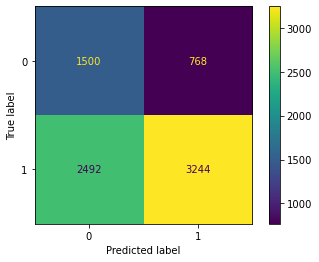

In [27]:
# get statistics 

conf = sk_metrics.confusion_matrix(y_true=labels_all, y_pred=preds_all)
disp = sk_metrics.ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot() 
print("f1 macro" , sk_metrics.f1_score(labels_all, preds_all, average='macro'))
print("fi micro" , sk_metrics.f1_score(labels_all, preds_all, average='micro'))

In [28]:
print(torch.argmax(output.logits,dim=1))
print(labels.flatten())
print(torch.argmax(output.logits,dim=1) == labels.flatten())
print(torch.sum(torch.torch.argmax(output.logits,dim=1) == labels.flatten()))

tensor([0, 0, 1, 1])
tensor([1, 0, 1, 1])
tensor([False,  True,  True,  True])
tensor(3)


In [29]:
labels

tensor([[1],
        [0],
        [1],
        [1]])

In [30]:
from datetime import datetime

In [31]:
activation[0].shape

torch.Size([4, 2048, 1, 1])

In [32]:
# save feature vectors 
dir_name = f"./results/Inception_examples_{len(labels_all)}_time_{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}"
os.mkdir(dir_name)
feature_vector_filename = os.path.join(dir_name, f'feature_vectors.pt')
labels_filename = os.path.join(dir_name, f'labels.pt')
torch.save(incepetion_features_all, feature_vector_filename)
torch.save(labels_all, labels_filename)

In [33]:
class InceptionNet(nn.Module):
    def __init__(self):
        super(InceptionNet,self).__init__()
        self = models.inception_v3()
        self.model.fc = nn.Linear(2048,100)      
        self.fc = nn.Linear(100,2)     
        
    def forward(self, x):
        batch_size ,_,_,_ =x.shape
        x = self.model(x)
        x = self.fc(x)
        return x

# Train Inception model

In [64]:
# time to train our model
# hyper-parameters
batch_size = 128
learning_rate = 1e-4
epochs = 20

# dataloaders - creating batches and shuffling the data
trainloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)
# testloader = torch.utils.data.DataLoader(
#     testset, batch_size=batch_size, shuffle=False, num_workers=2)

# device - cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# loss criterion
criterion = nn.CrossEntropyLoss()

# build our model and send it to the device
model = models.inception_v3()
model.fc = nn.Sequential(nn.Linear(2048,100), nn.Linear(100,2))

# optimizer - SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [65]:
# function to calcualte accuracy of the model
def calculate_accuracy(model, dataloader, device):
    model.eval() # put in evaluation mode
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10,10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1 

    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix

In [ ]:
# training loop
for epoch in range(1, epochs + 1):
    model.train()  # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad()  # zero the parameter gradients
        loss.backward()  # backpropagation
        optimizer.step()  # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader)

    # Calculate training/test set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    test_accuracy, _ = calculate_accuracy(model, testloader, device)

    log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | Test accuracy: {:.3f}% | ".format(epoch, running_loss, train_accuracy, test_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)
    
    # save model
    if epoch % 20 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, './checkpoints/cifar_cnn_ckpt.pth')

print('==> Finished Training ...')

## import model VGG16

In [ ]:
model = models.vgg16()
# for VGG16
dataset_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
# get feature vectors
feature_vector_all = torch.empty([0,49])
labels_all = torch.empty([0,1])
for i, data in enumerate(dataset_loader):
    images, labels = data
    img_to_show = images[0].detach().numpy().transpose(1, 2, 0)
    plt.imshow(img_to_show)
    labels = labels.unsqueeze(1)
    labels_all = torch.vstack((labels_all, labels))
    feature_map = model.features(images)
    max_pool_output = torch.max(feature_map,dim=1).values
    feature_vector = max_pool_output.view(-1,49)  
    feature_vector_all = torch.vstack((feature_vector_all, feature_vector))  
    print(feature_vector_all.size())
    print(labels_all.size())
#     # for debug
    if i == 200:
        break

In [365]:
print(len(feature_vector_all))
print(labels_all[:-4].size())

0
torch.Size([2000, 1])
